# Conhecendo os dados

### 1. Importando Bibliotecas:

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

### 2. Carregando e Explorando os Dados:

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/Tamireees/Datathon-Projeto-Passos-Magicos/refs/heads/main/dados/PEDE_PASSOS_DATASET_FIAP.csv', sep=';')

* *Identificamos que seria benéfico dividir os dados por ano, pois essa abordagem nos permitiria obter uma visualização mais clara e detalhada das informações, além de facilitar uma análise mais precisa ao observar as variações e tendências ao longo de diferentes períodos.*

### Criação de funções:
(para dividir os dataframes, realizar a limpeza dos dados, gerar o mapa de correlação e criar o gráfico de contagem)

In [4]:
def filter_columns(df, filters: list): # adiciono no array o padrão que existe nas colunas e que não quero que tenha na saída final
    selected_columns = [True] * len(df.columns)  # Inicializa todas as colunas como True
    for index, column in enumerate(df.columns):
        if any(filter in column for filter in filters): selected_columns[index] = False
    return df[df.columns[selected_columns]]


In [5]:
def cleaning_dataset(df):
  _df = df.dropna(subset=df.columns.difference(['NOME']), how='all') # executa o dropna para todas as colunas sem visualizar a coluna NOME
  _df = _df[~_df.isna().all(axis=1)] # remove linhas com apenas NaN, se tiver algum dado na linha não remove
  return _df

In [6]:
def plot_exact_counter(size, x, y, df) -> None:
  import matplotlib.pyplot as plt
  import seaborn as sns
  import pandas as pd

  plt.figure(figsize=size)
  barplot = plt.bar(y.index, y.values)
  plt.xlabel(x)
  plt.ylabel('Count')

  for index, value in enumerate(y.values):
        plt.text(index, value, round(value, 2), color='black', ha="center")

In [7]:
def analyse_corr(df):
  import seaborn as sns
  import matplotlib.pyplot as plt

  df = df.apply(pd.to_numeric, errors='coerce')

  corr_matrix = df.corr()
  plt.figure(figsize=(10, 8))
  sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
  plt.show()

## 2020

### **Conhecendo os dados:**

In [8]:
df_2020 = filter_columns(df, ['2021', '2022'])
df_2020 = cleaning_dataset(df_2020)
df_2020.head()

,INSTITUICAO_ENSINO_ALUNO_2020,NOME,IDADE_ALUNO_2020,ANOS_PM_2020,FASE_TURMA_2020,PONTO_VIRADA_2020,INDE_2020,INDE_CONCEITO_2020,PEDRA_2020,DESTAQUE_IEG_2020,DESTAQUE_IDA_2020,DESTAQUE_IPV_2020,IAA_2020,IEG_2020,IPS_2020,IDA_2020,IPP_2020,IPV_2020,IAN_2020
0,Escola Pública,ALUNO-1,11,2,2H,Não,7.883752,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,Ponto a melhorar em 2021: Empenhar-se mais nas...,Seu destaque em 2020: A sua boa integração aos...,8.500020000000001,8.7,7.5,7,5.9375,7.75,10
2,Escola Pública,ALUNO-3,12,2,3H,Não,7.856389666666666,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,Ponto a melhorar em 2021: Empenhar-se mais nas...,Seu destaque em 2020: A sua boa integração aos...,7.91667,8.9,7.5,5.5,8.125,8.111113333333334,10
3,Escola Pública,ALUNO-4,10,2,1D,Não,5.076252,D,Quartzo,Ponto a melhorar em 2021: Melhorar a sua entre...,Ponto a melhorar em 2021: Empenhar-se mais nas...,Ponto a melhorar em 2021: Integrar-se mais aos...,8.000020000000001,4.1,6.875,0,7.1875,7.75,5
4,Escola Pública,ALUNO-5,10,1,2M,Não,8.077085,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,Seu destaque em 2020: As suas boas notas na Pa...,Seu destaque em 2020: A sua boa integração aos...,7.50002,8,7.5,7.5,8.4375,8.166665,10
7,Rede Decisão/União,ALUNO-8,14,3,4L,Sim,8.381390666666666,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,Ponto a melhorar em 2021: Empenhar-se mais nas...,Seu destaque em 2020: A sua boa integração aos...,8.33334,9.9,4.375,7.333333333333333,8.749999999999998,8.94445,10


In [9]:
df_2020_clean = df_2020


In [10]:
df_2020_clean = df_2020_clean[df_2020_clean['PEDRA_2020'] != 'D9891/2A']

### **Limpeza dos dados:**

In [11]:
# Alterando a quantidade de anos que estao no Passos Magicos, para o ano correspondente. E alterando o nome da coluna:
ano_map_2020 = {
2020: '0',
2019: '1',
2018: '2',
2017: '3',
2016: '4',
None: 'D971'
}

reverse_ano_map_2020 = {v: k for k, v in ano_map_2020.items()}
df_2020_clean['ANOS_PM_2020'] = (df_2020_clean['ANOS_PM_2020'].map(reverse_ano_map_2020))

df_2020_clean.rename(columns={'ANOS_PM_2020': 'ANO_INGRESSO_2020'}, inplace=True)

df_2020_clean['ANO_INGRESSO_2020'] = pd.to_datetime(df_2020_clean['ANO_INGRESSO_2020'], format='%Y')
# Extraindo apenas o ano
df_2020_clean['ANO_INGRESSO_2020'] = df_2020_clean['ANO_INGRESSO_2020'].dt.year

In [12]:
# Separando a parte numérica e a parte alfabética
df_2020_clean['FASE_2020'] = df_2020_clean['FASE_TURMA_2020'].str.extract('(\d+)')  # Captura os números
df_2020_clean['TURMA_2020'] = df_2020_clean['FASE_TURMA_2020'].str.extract('([A-Za-z]+)')  # Captura as letras



In [13]:
# Transformar as colunas de categorias em valores binários (0 e 1)
df_2020_clean['PONTO_VIRADA_2020'] = df_2020_clean['PONTO_VIRADA_2020'].apply(lambda x: 1 if x == 'Sim' else 0)

In [14]:
df_2020_clean['INDE_2020'] = pd.to_numeric(df_2020_clean['INDE_2020'], errors='coerce')

In [15]:
df_2020_clean['PEDRA_2020'] = pd.Categorical(df_2020_clean['PEDRA_2020'])

In [16]:
# Não tem definição essa coluna.
df_2020_clean['INDE_CONCEITO_2020'].unique()

array(['B', 'D', 'A', 'C'], dtype=object)

In [17]:
df_2020_clean['DESTAQUE_IPV_2020'] = df_2020_clean['DESTAQUE_IPV_2020'].apply(lambda x: 1 if isinstance(x, str) and 'Seu destaque em 2020:' in x else 0)
df_2020_clean['DESTAQUE_IDA_2020'] = df_2020_clean['DESTAQUE_IDA_2020'].apply(lambda x: 1 if 'Seu destaque' in x else 0)
df_2020_clean['DESTAQUE_IEG_2020'] = df_2020_clean['DESTAQUE_IEG_2020'].apply(lambda x: 1 if 'Seu destaque' in x else 0)


In [18]:
df_2020_clean[['IAA_2020', 'IEG_2020', 'IPS_2020', 'IDA_2020', 'IPP_2020', 'IPV_2020', 'IAN_2020']] = df_2020_clean[['IAA_2020', 'IEG_2020', 'IPS_2020', 'IDA_2020', 'IPP_2020', 'IPV_2020', 'IAN_2020']].apply(pd.to_numeric, errors='coerce')

In [19]:
df_2020_clean = df_2020_clean.drop(columns=['TURMA_2020', 'FASE_TURMA_2020', 'INSTITUICAO_ENSINO_ALUNO_2020', 'IDADE_ALUNO_2020', 'INDE_CONCEITO_2020'])

## 2021

### **Conhecendo os dados:**

In [20]:
df_2021 = filter_columns(df, ['2020', '2022'])
df_2021 = cleaning_dataset(df_2021)
df_2021.head()

,NOME,FASE_2021,TURMA_2021,INSTITUICAO_ENSINO_ALUNO_2021,SINALIZADOR_INGRESSANTE_2021,PEDRA_2021,INDE_2021,IAA_2021,IEG_2021,IPS_2021,...,IPP_2021,REC_EQUIPE_1_2021,REC_EQUIPE_2_2021,REC_EQUIPE_3_2021,REC_EQUIPE_4_2021,PONTO_VIRADA_2021,IPV_2021,IAN_2021,NIVEL_IDEAL_2021,DEFASAGEM_2021
0,ALUNO-1,2.0,G,Rede Decisão,Ingressante,Ametista,7.319,7.5,6.3,6.9,...,7.7,Promovido de Fase,Promovido de Fase,Mantido na Fase atual,Não avaliado,Não,8.1,5.0,Nível 3 (7o e 8o ano),-1.0
2,ALUNO-3,3.0,F,Escola Pública,Veterano,Ametista,7.021,7.1,6.9,6.3,...,7.3,Promovido de Fase,Promovido de Fase,Mantido na Fase atual,Não avaliado,Não,7.2,10.0,Nível 3 (7o e 8o ano),0.0
4,ALUNO-5,2.0,L,Escola Pública,Veterano,Ametista,7.399,7.4,7.5,7.5,...,8.5,Promovido de Fase,Mantido na Fase atual,Mantido na Fase atual,Não avaliado,Não,7.4,10.0,Nível 2 (5o e 6o ano),0.0
7,ALUNO-8,5.0,L,Rede Decisão,Veterano,Topázio,8.269,8.8,8.6,7.5,...,8.0,Promovido de Fase + Bolsa,Promovido de Fase,Promovido de Fase,Mantido na Fase atual,Não,8.5,10.0,Nível 5 (1o EM),0.0
10,ALUNO-11,1.0,A,Rede Decisão,Veterano,Topázio,8.990,9.0,10.0,6.3,...,7.7,Promovido de Fase,Mantido na Fase atual,Mantido na Fase atual,Não avaliado,Sim,9.7,10.0,Nível 1 (4o ano),0.0


### **Limpeza dos dados:**

In [21]:
df_2021_clean = df_2021


In [22]:
df_2021_clean['SINALIZADOR_INGRESSANTE_2021'].value_counts()

Veterano       437
Ingressante    249
Name: SINALIZADOR_INGRESSANTE_2021, dtype: int64

In [23]:
df_2021_clean['SINALIZADOR_INGRESSANTE_2021'].isnull().sum()

0

In [24]:
df_2021_clean['SINALIZADOR_INGRESSANTE_2021'] = df_2021_clean['SINALIZADOR_INGRESSANTE_2021'].apply(lambda x: 2021 if isinstance(x, str) and 'Ingressante' in x else 'Veterano')
df_ano_veterano = df_2021_clean[df_2021_clean['SINALIZADOR_INGRESSANTE_2021'] != 2021][['NOME', 'SINALIZADOR_INGRESSANTE_2021']]

df_2020_ano_regresso = df_2020_clean[['NOME', 'ANO_INGRESSO_2020']]

In [25]:
merged_df = df_ano_veterano.merge(df_2020_ano_regresso[['NOME', 'ANO_INGRESSO_2020']], on='NOME', how='left')
df_2021_clean = df_2021_clean.merge(merged_df[['NOME', 'ANO_INGRESSO_2020']], on='NOME', how='left')

In [26]:
df_2021_ano = df_2021_clean[['SINALIZADOR_INGRESSANTE_2021', 'ANO_INGRESSO_2020']]
df_2021_ano.loc[(df_2021_ano['SINALIZADOR_INGRESSANTE_2021'] == 2021) & (df_2021_ano['ANO_INGRESSO_2020'].isna()),'ANO_INGRESSO_2020'] = 2021


In [27]:
df_2021_clean['ANO_INGRESSO_2020'].update(df_2021_ano['ANO_INGRESSO_2020'])

In [28]:
df_2021_clean = df_2021_clean[~df_2021_clean['NOME'].isin(['ALUNO-71', 'ALUNO-506'])]


In [29]:
df_2021_clean = df_2021_clean.drop(columns=['TURMA_2021', 'INSTITUICAO_ENSINO_ALUNO_2021', 'SINALIZADOR_INGRESSANTE_2021'])


In [30]:
df_2021_clean = df_2021_clean.rename(columns={'ANO_INGRESSO_2020': 'ANO_INGRESSO_2021'})

In [31]:
df_2021_clean['ANO_INGRESSO_2021'] = pd.to_datetime(df_2021_clean['ANO_INGRESSO_2021'], format='%Y')
# Extraindo apenas o ano
df_2021_clean['ANO_INGRESSO_2021'] = df_2021_clean['ANO_INGRESSO_2021'].dt.year

In [32]:
# Analisar, temos 12 alunos sem data de entrada:
df_2021_clean[df_2021_clean['ANO_INGRESSO_2021'].isnull()]

,NOME,FASE_2021,PEDRA_2021,INDE_2021,IAA_2021,IEG_2021,IPS_2021,IDA_2021,IPP_2021,REC_EQUIPE_1_2021,REC_EQUIPE_2_2021,REC_EQUIPE_3_2021,REC_EQUIPE_4_2021,PONTO_VIRADA_2021,IPV_2021,IAN_2021,NIVEL_IDEAL_2021,DEFASAGEM_2021,ANO_INGRESSO_2021
90,ALUNO-176,2.0,Ágata,5.674,7.5,6.3,5.0,4.3,6.7,Mantido na Fase atual,Mantido na Fase atual,Mantido na Fase atual,Não avaliado,Não,5.7,5.0,Nível 3 (7o e 8o ano),-1.0,NaN
158,ALUNO-336,0.0,Ametista,7.533,9.0,10.0,6.3,6.9,7.5,Mantido na Fase atual,Mantido na Fase atual,Não avaliado,Não avaliado,Não,6.9,5.0,Nível 1 (4o ano),-1.0,NaN
208,ALUNO-432,0.0,Quartzo,4.946,9.0,6.7,5.0,2.6,2.5,Mantido na Fase atual,Mantido na Fase atual,Não avaliado,Não avaliado,Não,4.8,5.0,Nível 2 (5o e 6o ano),-2.0,NaN
346,ALUNO-706,2.0,Ametista,7.213,10.0,6.3,7.5,6.9,7.7,Mantido na Fase atual,Promovido de Fase,Promovido de Fase,Não avaliado,Não,7.8,5.0,Nível 3 (7o e 8o ano),-1.0,NaN
387,ALUNO-781,3.0,Quartzo,5.450,8.8,3.1,7.5,3.3,6.7,Mantido na Fase atual,Alocado em Fase anterior,Mantido na Fase atual,Não avaliado,Não,4.4,10.0,Nível 3 (7o e 8o ano),0.0,NaN
453,ALUNO-897,3.0,Quartzo,5.135,7.9,3.3,6.9,4.3,6.7,Mantido na Fase atual,Alocado em Fase anterior,Mantido na Fase atual,Não avaliado,Não,4.8,5.0,Nível 4 (9o ano),-1.0,NaN
506,ALUNO-995,1.0,Ágata,5.751,8.0,5.8,7.5,0.9,7.7,Mantido na Fase atual,Mantido na Fase atual,Mantido na Fase atual,Não avaliado,Não,7.9,5.0,Nível 2 (5o e 6o ano),-1.0,NaN
560,ALUNO-1096,3.0,Topázio,8.814,10.0,8.9,7.5,7.5,8.3,Promovido de Fase + Bolsa,Promovido de Fase + Bolsa,Promovido de Fase,Não avaliado,Sim,9.7,10.0,Nível 3 (7o e 8o ano),0.0,NaN
619,ALUNO-1201,7.0,Ametista,7.031,7.1,6.1,5.6,6.5,8.1,Promovido de Fase + Bolsa,Promovido de Fase + Bolsa,Promovido de Fase + Bolsa,Promovido de Fase + Bolsa,Não,7.1,10.0,Nível 7 (3o EM),0.0,NaN
638,ALUNO-1233,5.0,Ametista,7.416,9.6,6.7,5.0,7.8,7.7,Mantido na Fase atual,Mantido na Fase + Bolsa,Promovido de Fase,Promovido de Fase,Não,6.5,10.0,Nível 5 (1o EM),0.0,NaN


In [33]:
# Transformar as colunas de categorias em valores binários (0 e 1)
df_2021_clean['PONTO_VIRADA_2021'] = df_2021_clean['PONTO_VIRADA_2021'].apply(lambda x: 1 if x == 'Sim' else 0)

In [34]:
df_2021_clean['INDE_2021'] = pd.to_numeric(df_2021_clean['INDE_2021'], errors='coerce')


In [35]:
df_2021_clean['NIVEL_IDEAL_2021'] = pd.Categorical(df_2021_clean['NIVEL_IDEAL_2021'])
df_2021_clean['PEDRA_2021'] = pd.Categorical(df_2021_clean['PEDRA_2021'])

In [36]:

# Dado que as colunas de recomendações (['REC_EQUIPE_2_2021', 'REC_EQUIPE_3_2021', 'REC_EQUIPE_4_2021']) contêm algumas recomendações repetidas e valores nan, 
# podemos unificá-las em uma nova coluna de forma mais eficiente.
# Unificar considerando a recomendação mais frequente
df_2021_clean['REC_AVA_UNIFICADO'] = df_2021_clean[['REC_EQUIPE_1_2021', 'REC_EQUIPE_2_2021', 'REC_EQUIPE_3_2021', 'REC_EQUIPE_4_2021']].apply(lambda row: row.mode()[0] if not row.mode().empty else None, axis=1)
df_2021_clean.drop(columns=['REC_EQUIPE_1_2021','REC_EQUIPE_2_2021', 'REC_EQUIPE_3_2021', 'REC_EQUIPE_4_2021'], inplace=True)

In [37]:
# Corrigindo a sintaxe do dicionário e aplicando ao campo NIVEL_IDEAL_2022
fase_map_2021 = {
    0: 'ALFA  (2o e 3o ano)',
    1: 'Nível 1 (4o ano)',
    2: 'Nível 2 (5o e 6o ano)',
    3: 'Nível 3 (7o e 8o ano)',
    4: 'Nível 4 (9o ano)',
    5: 'Nível 5 (1o EM)',
    6: 'Nível 6 (2o EM)',
    7: 'Nível 7 (3o EM)',
    8: 'Nível 8 (Universitários)',
    9: 'ERRO'
}

# Mapeando o valor de NIVEL_IDEAL_2022 para a numeração
# Criando um dicionário reverso para fazer a conversão dos textos para os números
reverse_fase_map_2021 = {v: k for k, v in fase_map_2021.items()}

# Substituindo o texto em NIVEL_IDEAL_2022 pela numeração correspondente
df_2021_clean['NIVEL_IDEAL_2021'] = df_2021_clean['NIVEL_IDEAL_2021'].map(reverse_fase_map_2021)


## 2022

### **Conhecendo os dados:**

In [38]:
df_2022 = filter_columns(df, ['2020', '2021'])
df_2022 = cleaning_dataset(df_2022)
df_2022.head()

,NOME,FASE_2022,TURMA_2022,ANO_INGRESSO_2022,BOLSISTA_2022,INDE_2022,CG_2022,CF_2022,CT_2022,PEDRA_2022,...,IPP_2022,REC_AVA_1_2022,REC_AVA_2_2022,REC_AVA_3_2022,REC_AVA_4_2022,INDICADO_BOLSA_2022,PONTO_VIRADA_2022,IPV_2022,IAN_2022,NIVEL_IDEAL_2022
1,ALUNO-2,0.0,K,2022.0,Não,7.675509,245.0,66.0,6.0,Ametista,...,5.625000,Mantido na Fase + Bolsa,Mantido na Fase atual,NaN,NaN,Sim,Não,7.916665,5.0,Fase 2 (5º e 6º ano)
3,ALUNO-4,2.0,J,2022.0,Não,7.117065,451.0,69.0,3.0,Ametista,...,6.250000,Promovido de Fase,Mantido na Fase atual,Promovido de Fase,NaN,Não,Não,8.055553,5.0,Fase 3 (7º e 8º ano)
4,ALUNO-5,2.0,L,2019.0,Não,7.232336,415.0,61.0,12.0,Ametista,...,6.458333,Mantido na Fase atual,Promovido de Fase,Mantido na Fase atual,NaN,Não,Não,7.833337,5.0,Fase 3 (7º e 8º ano)
5,ALUNO-6,2.0,K,2022.0,Não,7.741669,221.0,35.0,2.0,Ametista,...,6.250000,Mantido na Fase atual,Promovido de Fase,Mantido na Fase atual,NaN,Não,Não,7.500000,10.0,Fase 2 (5º e 6º ano)
6,ALUNO-7,1.0,U,2022.0,Não,7.406743,357.0,93.0,7.0,Ametista,...,5.937500,Promovido de Fase,Promovido de Fase,NaN,NaN,Não,Não,7.916670,5.0,Fase 2 (5º e 6º ano)


### **Tratamento e Limpeza dos dados:**

In [39]:
df_2022_clean = df_2022.drop(columns=['TURMA_2022', 'CG_2022', 'CF_2022', 'CT_2022'])


In [40]:
df_2022_clean['ANO_INGRESSO_2022'] = pd.to_datetime(df_2022_clean['ANO_INGRESSO_2022'], format='%Y')
# Extraindo apenas o ano
df_2022_clean['ANO_INGRESSO_2022'] = df_2022_clean['ANO_INGRESSO_2022'].dt.year

In [41]:
# Transformar as colunas de categorias em valores binários (0 e 1)
df_2022_clean['BOLSISTA_2022'] = df_2022_clean['BOLSISTA_2022'].apply(lambda x: 1 if x == 'Sim' else 0)
df_2022_clean['DESTAQUE_IEG_2022'] = df_2022_clean['DESTAQUE_IEG_2022'].apply(lambda x: 1 if 'Destaque' in x else 0)
df_2022_clean['DESTAQUE_IDA_2022'] = df_2022_clean['DESTAQUE_IDA_2022'].apply(lambda x: 1 if 'Destaque' in x else 0)
df_2022_clean['DESTAQUE_IPV_2022'] = df_2022_clean['DESTAQUE_IPV_2022'].apply(lambda x: 1 if 'Destaque' in x else 0)
df_2022_clean['INDICADO_BOLSA_2022'] = df_2022_clean['INDICADO_BOLSA_2022'].apply(lambda x: 1 if x == 'Sim' else 0)
df_2022_clean['PONTO_VIRADA_2022'] = df_2022_clean['PONTO_VIRADA_2022'].apply(lambda x: 1 if x == 'Sim' else 0)

In [42]:
df_2022_clean[['NOTA_PORT_2022', 'NOTA_MAT_2022', 'NOTA_ING_2022']].isnull().sum()
df_2022_clean = df_2022_clean.drop(columns=['NOTA_PORT_2022', 'NOTA_MAT_2022', 'NOTA_ING_2022'])

In [43]:
df_2022_clean['NIVEL_IDEAL_2022'] = pd.Categorical(df_2022_clean['NIVEL_IDEAL_2022'])
df_2022_clean['PEDRA_2022'] = pd.Categorical(df_2022_clean['PEDRA_2022'])

In [44]:
# Dado que as colunas de recomendações (REC_AVA_1_2022, REC_AVA_2_2022, REC_AVA_3_2022, REC_AVA_4_2022) contêm algumas recomendações repetidas e valores nan, 
# podemos unificá-las em uma nova coluna de forma mais eficiente.
# Unificar considerando a recomendação mais frequente
df_2022_clean['REC_AVA_UNIFICADO'] = df_2022_clean[['REC_AVA_1_2022', 'REC_AVA_2_2022', 'REC_AVA_3_2022', 'REC_AVA_4_2022']].apply(lambda row: row.mode()[0] if not row.mode().empty else None, axis=1)
df_2022_clean.drop(columns=['REC_AVA_1_2022', 'REC_AVA_2_2022', 'REC_AVA_3_2022', 'REC_AVA_4_2022'], inplace=True)


In [45]:
# Corrigindo a sintaxe do dicionário e aplicando ao campo NIVEL_IDEAL_2022
fase_map = {
    0: 'ALFA  (2º e 3º ano)',
    1: 'Fase 1 (4º ano)',
    2: 'Fase 2 (5º e 6º ano)',
    3: 'Fase 3 (7º e 8º ano)',
    4: 'Fase 4 (9º ano)',
    5: 'Fase 5 (1º EM)',
    6: 'Fase 6 (2º EM)',
    7: 'Fase 7 (3º EM)',
    8: 'Fase 8 (Universitários)'
}

# Mapeando o valor de NIVEL_IDEAL_2022 para a numeração
# Criando um dicionário reverso para fazer a conversão dos textos para os números
reverse_fase_map = {v: k for k, v in fase_map.items()}

# Substituindo o texto em NIVEL_IDEAL_2022 pela numeração correspondente
df_2022_clean['NIVEL_IDEAL_2022'] = df_2022_clean['NIVEL_IDEAL_2022'].map(reverse_fase_map)

# DADOS 'PASSOS MÁGICOS'

## **Conhecendo os dados:**

**Dados Dataset correspondente aos anos de 2020, 2021 e 2022:**
* 'NOME': 'Nome do aluno (dados anonimizados)'

* 'FASE': 'Fase e o Nível de Aprendizado do Aluno no ano correspondente'

* 'PEDRA': 'Classificação do Aluno baseado no número do INDE no ano correspondente'

* 'PONTO_VIRADA': 'Campo do tipo booleano que sinaliza se o Aluno atingiu o “Ponto de Virada” no ano correspondente'

* 'ANO_INGRESSO': 'Ano que o Aluno ingressou na Passos Mágicos (atualizado no ano correspondente)

* 'IAN': 'Indicador de Adequação ao Nível – Média das notas de adequação do Aluno ao nível atual no ano correspondente

* 'IDA': 'Indicador de Aprendizagem - Média das notas do Indicador de Aprendizagem no ano correspondente'

* 'IEG': 'Indicador de Engajamento – Média das notas de Engajamento do Aluno no ano correspondente'

* 'IAA': 'Indicador de Autoavaliação – Média das notas de Autoavaliação do Aluno no ano correspondente'

* 'IPS': 'Indicador Psicossocial – Média das notas psicossociais do Aluno no ano correspondente'

* 'IPP': 'Indicador Psicopedagógico – Média das notas psicopedagógicas do Aluno no ano correspondente'

* 'IPV': 'Indicador de Ponto de Virada – Média das notas de Ponto de Virada do Aluno no ano correspondente'

* 'INDE': 'Índice do Desenvolvimento Educacional – Métrica de processo avaliativo geral do Aluno no ano correspondente',

In [46]:
df_merged = df_2020_clean.merge(df_2021_clean, on='NOME', how='outer')
df_clean = df_merged.merge(df_2022_clean, on='NOME', how='outer')

In [47]:
df_clean = df_clean[[
    'NOME','FASE_2020', 'FASE_2021', 'FASE_2022', 'PEDRA_2020','PEDRA_2021', 'PEDRA_2022', 'PONTO_VIRADA_2020', 
    'PONTO_VIRADA_2021', 'PONTO_VIRADA_2022','ANO_INGRESSO_2020', 'ANO_INGRESSO_2021', 'ANO_INGRESSO_2022',  
    'IAN_2020', 'IAN_2021','IAN_2022', 'IDA_2020','IDA_2021','IDA_2022', 
    'IEG_2020','IEG_2021', 'IEG_2022', 'IAA_2020','IAA_2021', 'IAA_2022',
    'IPS_2020','IPS_2021','IPS_2022', 'IPP_2020','IPP_2021', 'IPP_2022', 
    'IPV_2020','IPV_2021','IPV_2022', 'INDE_2020', 'INDE_2021', 'INDE_2022']]

In [48]:
df_clean.shape

(1348, 37)

In [49]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1348 entries, 0 to 1347
Data columns (total 37 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   NOME               1348 non-null   object  
 1   FASE_2020          727 non-null    object  
 2   FASE_2021          684 non-null    float64 
 3   FASE_2022          862 non-null    float64 
 4   PEDRA_2020         727 non-null    category
 5   PEDRA_2021         684 non-null    category
 6   PEDRA_2022         862 non-null    category
 7   PONTO_VIRADA_2020  727 non-null    float64 
 8   PONTO_VIRADA_2021  684 non-null    float64 
 9   PONTO_VIRADA_2022  862 non-null    float64 
 10  ANO_INGRESSO_2020  727 non-null    float64 
 11  ANO_INGRESSO_2021  672 non-null    float64 
 12  ANO_INGRESSO_2022  862 non-null    float64 
 13  IAN_2020           727 non-null    float64 
 14  IAN_2021           684 non-null    float64 
 15  IAN_2022           862 non-null    float64 
 16  IDA_20

In [50]:
df_clean['NOME'].duplicated().sum()

0

In [51]:
df_clean.isnull().sum()
# Acredito que quando os valores estão vazios, são alunos que podem ter desistido de participar do projeto.

NOME                   0
FASE_2020            621
FASE_2021            664
FASE_2022            486
PEDRA_2020           621
PEDRA_2021           664
PEDRA_2022           486
PONTO_VIRADA_2020    621
PONTO_VIRADA_2021    664
PONTO_VIRADA_2022    486
ANO_INGRESSO_2020    621
ANO_INGRESSO_2021    676
ANO_INGRESSO_2022    486
IAN_2020             621
IAN_2021             664
IAN_2022             486
IDA_2020             621
IDA_2021             664
IDA_2022             486
IEG_2020             621
IEG_2021             664
IEG_2022             486
IAA_2020             621
IAA_2021             664
IAA_2022             486
IPS_2020             621
IPS_2021             664
IPS_2022             486
IPP_2020             621
IPP_2021             664
IPP_2022             486
IPV_2020             621
IPV_2021             664
IPV_2022             486
INDE_2020            621
INDE_2021            664
INDE_2022            486
dtype: int64

## **Limpeza dos dados:**

In [52]:
def classificar_status(row):
    if pd.notnull(row['ANO_INGRESSO_2020']) and pd.notnull(row['ANO_INGRESSO_2021']) and pd.notnull(row['ANO_INGRESSO_2022']):
        return 'Ativo'
    
    if pd.notnull(row['ANO_INGRESSO_2020']) and pd.notnull(row['ANO_INGRESSO_2021']) and pd.isnull(row['ANO_INGRESSO_2022']):
        return 'Desistiu em 2022'    
    
    if pd.notnull(row['ANO_INGRESSO_2020']) and pd.isnull(row['ANO_INGRESSO_2021']) and pd.isnull(row['ANO_INGRESSO_2022']):
        return 'Desistiu em 2021'
        
    if pd.notnull(row['ANO_INGRESSO_2020']) and pd.isnull(row['ANO_INGRESSO_2021']) and pd.notnull(row['ANO_INGRESSO_2022']):
        return 'Retornou em 2022'
    
    return 'Desistencia'
df_clean_completo= df_clean #alterei para completo pois vai constar todas as variaveis do ano_ingresso_ANO
df_clean_completo['STATUS_ALUNO'] = df_clean.apply(classificar_status, axis=1)

In [53]:
df_clean['ANO_INGRESSO'] = df_clean_completo['ANO_INGRESSO_2020'].combine_first(df_clean_completo['ANO_INGRESSO_2021']).combine_first(df_clean_completo['ANO_INGRESSO_2022'])

df_clean_completo['STATUS_ALUNO'].unique(), df_clean_completo['ANO_INGRESSO'].unique()

(array(['Desistiu em 2022', 'Retornou em 2022', 'Ativo',
        'Desistiu em 2021', 'Desistencia'], dtype=object),
 array([2018., 2019., 2017., 2020., 2016., 2021.,   nan, 2022.]))

In [54]:
df_clean.drop(columns=['ANO_INGRESSO_2020', 'ANO_INGRESSO_2021', 'ANO_INGRESSO_2022'], inplace=True)

In [55]:
df_clean['STATUS_ALUNO'].unique()

array(['Desistiu em 2022', 'Retornou em 2022', 'Ativo',
       'Desistiu em 2021', 'Desistencia'], dtype=object)

In [56]:
df_clean[['FASE_2020', 'FASE_2021', 'FASE_2022']] = df_clean[['FASE_2020', 'FASE_2021', 'FASE_2022']].applymap(lambda x: int(x) if pd.notna(x) else x)

In [57]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1348 entries, 0 to 1347
Data columns (total 36 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   NOME               1348 non-null   object  
 1   FASE_2020          727 non-null    float64 
 2   FASE_2021          684 non-null    float64 
 3   FASE_2022          862 non-null    float64 
 4   PEDRA_2020         727 non-null    category
 5   PEDRA_2021         684 non-null    category
 6   PEDRA_2022         862 non-null    category
 7   PONTO_VIRADA_2020  727 non-null    float64 
 8   PONTO_VIRADA_2021  684 non-null    float64 
 9   PONTO_VIRADA_2022  862 non-null    float64 
 10  IAN_2020           727 non-null    float64 
 11  IAN_2021           684 non-null    float64 
 12  IAN_2022           862 non-null    float64 
 13  IDA_2020           727 non-null    float64 
 14  IDA_2021           684 non-null    float64 
 15  IDA_2022           862 non-null    float64 
 16  IEG_20

## **Explorando os dados:**

### *Explorando as variáveis qualitativas*

In [58]:
qualitative_columns_total = [
    'FASE_2020', 'FASE_2021', 'FASE_2022', 'PEDRA_2020','PEDRA_2021', 'PEDRA_2022', 'PONTO_VIRADA_2020', 
    'PONTO_VIRADA_2021', 'PONTO_VIRADA_2022', 'STATUS_ALUNO']

* **Análise de Frequência**

In [59]:
categories = {
    'FASE': ['FASE_2020', 'FASE_2021', 'FASE_2022'],
    'PEDRA': ['PEDRA_2020', 'PEDRA_2021', 'PEDRA_2022'],
    'PONTO_VIRADA': ['PONTO_VIRADA_2020', 'PONTO_VIRADA_2021', 'PONTO_VIRADA_2022'],
    'STATUS_ALUNO': ['STATUS_ALUNO']
}

In [60]:
for category, cols in categories.items():
    print(f"\nDistribuição de Frequências para {category}:")

    display(df_clean[cols].apply(pd.Series.value_counts, axis=0))


Distribuição de Frequências para FASE:


,FASE_2020,FASE_2021,FASE_2022
0.0,82,120.0,190.0
1.0,172,136.0,192.0
2.0,155,162.0,155.0
3.0,122,115.0,148.0
4.0,55,59.0,76.0
5.0,54,50.0,60.0
6.0,30,23.0,18.0
7.0,33,19.0,23.0
8.0,24,NaN,NaN



Distribuição de Frequências para PEDRA:


,PEDRA_2020,PEDRA_2021,PEDRA_2022
Ametista,336,295,348
Ágata,171,178,250
Quartzo,128,110,134
Topázio,92,101,130



Distribuição de Frequências para PONTO_VIRADA:


,PONTO_VIRADA_2020,PONTO_VIRADA_2021,PONTO_VIRADA_2022
0.0,633,576,749
1.0,94,108,113



Distribuição de Frequências para STATUS_ALUNO:


,STATUS_ALUNO
Desistencia,621
Ativo,314
Desistiu em 2021,259
Desistiu em 2022,141
Retornou em 2022,13


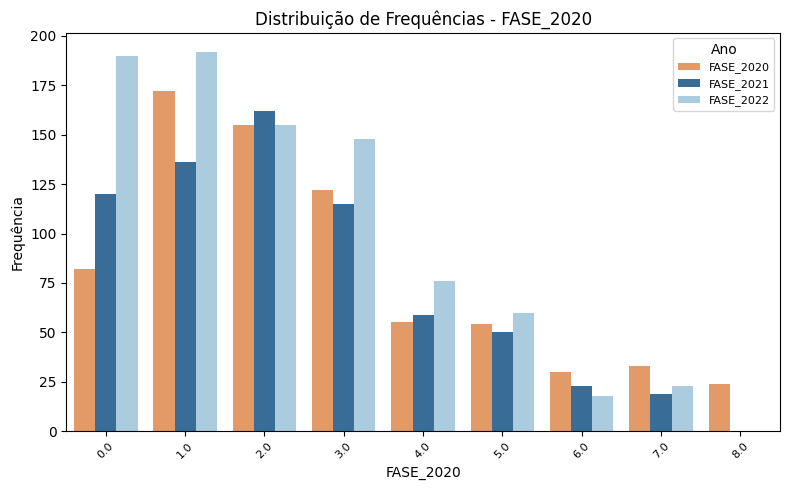

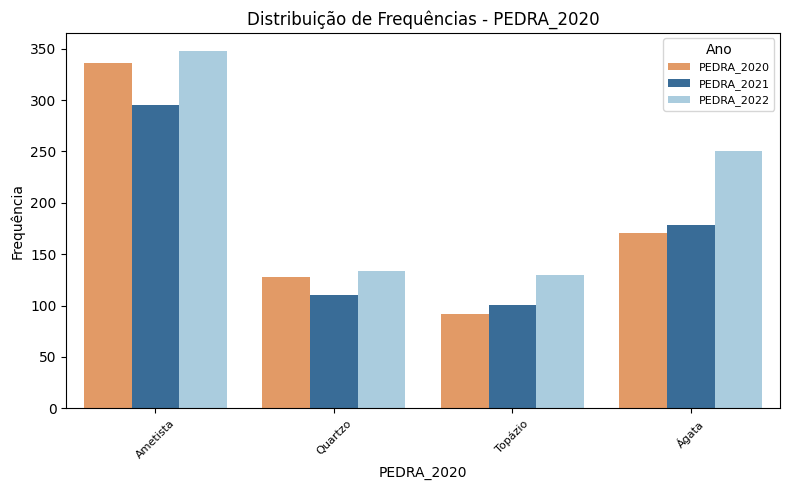

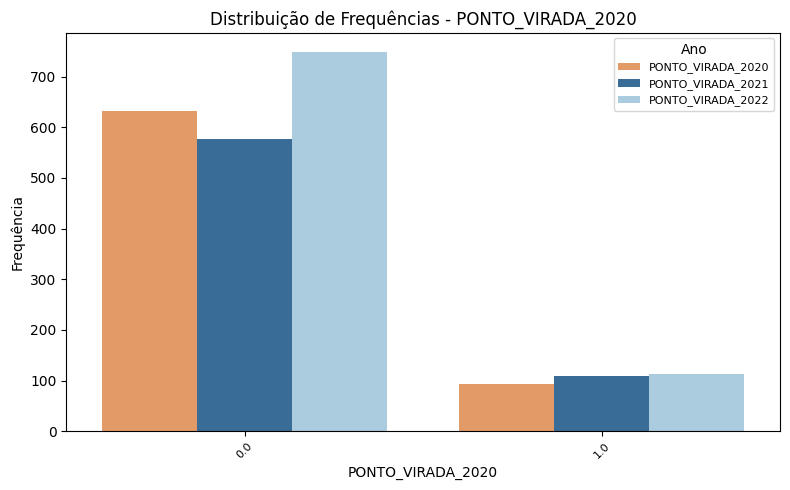

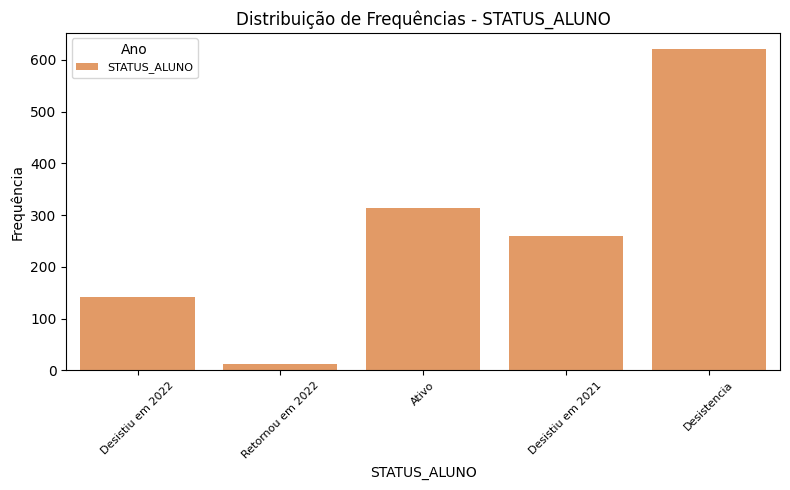

In [61]:
custom_palette = ['#F79651', '#2A6DA6', '#A2CFE6'] 
col_groups = [
    ['FASE_2020', 'FASE_2021', 'FASE_2022'],
    ['PEDRA_2020', 'PEDRA_2021', 'PEDRA_2022'],
    ['PONTO_VIRADA_2020', 'PONTO_VIRADA_2021', 'PONTO_VIRADA_2022'],
    ['STATUS_ALUNO']
]

for col_group in col_groups:
    
    if all(col in df_clean.columns for col in col_group):
        
        melted_data = pd.melt(
            df_clean[col_group].reset_index(),
            id_vars=['index'], 
            var_name='Ano', 
            value_name=col_group[0]  
        )
        plt.figure(figsize=(8, 5))
        sns.countplot(
            data=melted_data, 
            x=col_group[0],  
            hue='Ano', 
            palette=custom_palette
        )
        plt.title(f"Distribuição de Frequências - {col_group[0]}", fontsize=12)
        plt.xlabel(col_group[0], fontsize=10)
        plt.ylabel("Frequência", fontsize=10)
        plt.xticks(rotation=45, fontsize=8)
        plt.legend(title="Ano", fontsize=8)
        plt.tight_layout()
        plt.show()



* **Alunos que Desistiram**

   2020  2021  2022
0   NaN    92   180
1   NaN    42   125
2   NaN    20    77
3   NaN    41    85
4   NaN     8    24
5   NaN    18    26
6   NaN     5     6
7   NaN     3    12
8   0.0     0     0


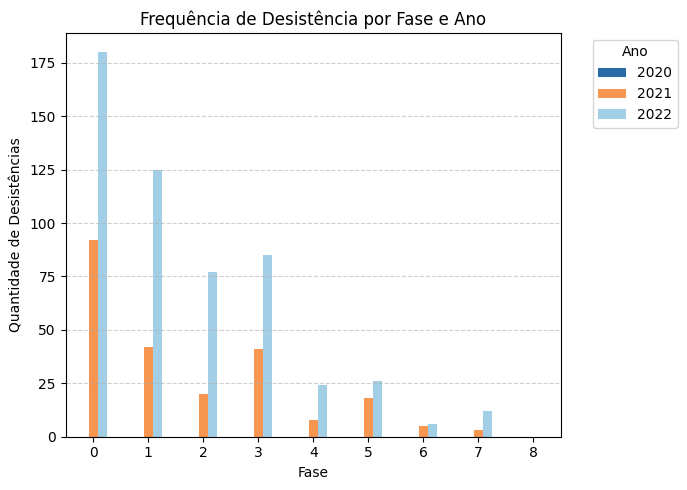

In [62]:
df_desistentes = df_clean[df_clean['STATUS_ALUNO'] == 'Desistencia']
df_desistentes['Ultima_Fase'] = df_desistentes[categories['FASE']].idxmax(axis=1).str.replace('FASE_', '').astype(int)

desistencia_por_fase_ano = pd.DataFrame({
    '2020': df_desistentes[df_desistentes['FASE_2020'].notna()].groupby('FASE_2020').size(),
    '2021': df_desistentes[df_desistentes['FASE_2021'].notna()].groupby('FASE_2021').size(),
    '2022': df_desistentes[df_desistentes['FASE_2022'].notna()].groupby('FASE_2022').size()
})
desistencia_por_fase_ano = desistencia_por_fase_ano.reindex([0, 1, 2, 3, 4, 5, 6, 7, 8], fill_value=0)
print(desistencia_por_fase_ano)

ax = desistencia_por_fase_ano.plot(kind='bar', figsize=(7, 5), color=['#2A6DA6', '#F79651', '#A2CFE6'])
plt.title('Frequência de Desistência por Fase e Ano')
plt.ylabel('Quantidade de Desistências')
plt.xlabel('Fase')
plt.xticks(rotation=0)
plt.legend(title="Ano", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()



### *Explorando as variáveis quantitativas*

* **Análise Descritiva:**

In [63]:
quantitative_columns_total = [
    'ANO_INGRESSO',  
    'IAN_2020', 'IAN_2021','IAN_2022', 'IDA_2020','IDA_2021','IDA_2022', 
    'IEG_2020','IEG_2021', 'IEG_2022', 'IAA_2020','IAA_2021', 'IAA_2022',
    'IPS_2020','IPS_2021','IPS_2022', 'IPP_2020','IPP_2021', 'IPP_2022', 
    'IPV_2020','IPV_2021','IPV_2022', 'INDE_2020', 'INDE_2021', 'INDE_2022'
]

In [64]:
display(df_clean[quantitative_columns_total].describe().T)

,count,mean,std,min,25%,50%,75%,max
ANO_INGRESSO,1344.0,2019.939732,1.785212,2016.000000,2019.000000,2020.000000,2022.000000,2022.000000
IAN_2020,727.0,7.431224,2.556944,2.500000,5.000000,5.000000,10.000000,10.000000
IAN_2021,684.0,6.900585,2.484723,2.500000,5.000000,5.000000,10.000000,10.000000
IAN_2022,862.0,6.421114,2.387816,2.500000,5.000000,5.000000,10.000000,10.000000
IDA_2020,727.0,6.322260,2.960073,0.000000,4.666667,7.000000,8.666667,10.000000
IDA_2021,684.0,5.430556,2.142955,0.000000,4.100000,5.900000,6.925000,9.500000
IDA_2022,862.0,6.070688,2.059346,0.000000,4.750000,6.333333,7.583333,9.916667
IEG_2020,727.0,7.681155,2.382122,0.000000,6.600000,8.500000,9.500000,10.000000
IEG_2021,684.0,6.842544,2.434306,0.000000,5.300000,7.200000,8.800000,10.000000
IEG_2022,862.0,7.880728,1.649023,0.000000,6.999971,8.312179,9.102970,10.000000


* **Distribuição de Dados:**

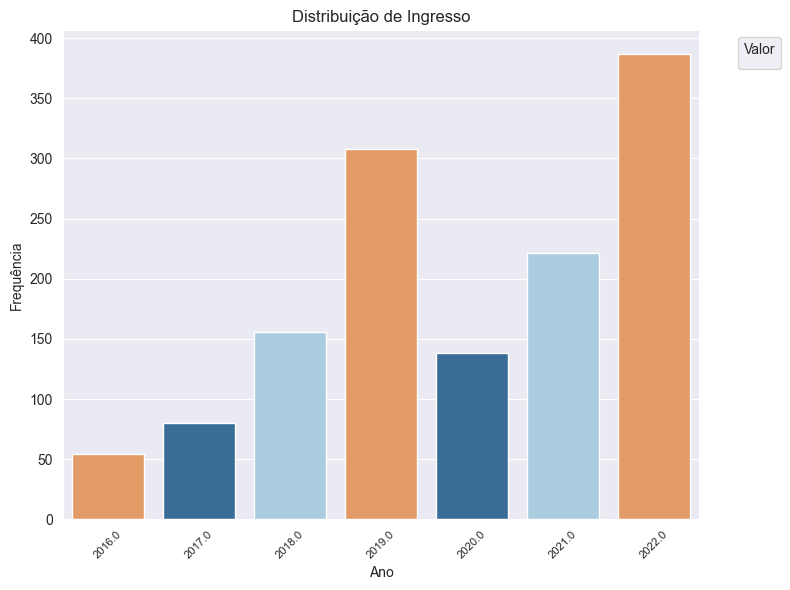

In [65]:
plt.figure(figsize=(8, 6))
sns.set_style('darkgrid')

sns.countplot(data=df_clean, x='ANO_INGRESSO', palette=['#F79651', '#2A6DA6', '#A2CFE6'])
plt.title(f'Distribuição de Ingresso', fontsize=12)
plt.ylabel('Frequência', fontsize=10)
plt.xlabel('Ano', fontsize=10)
plt.xticks(rotation=45, fontsize=8)
plt.legend(title='Valor', fontsize=10, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

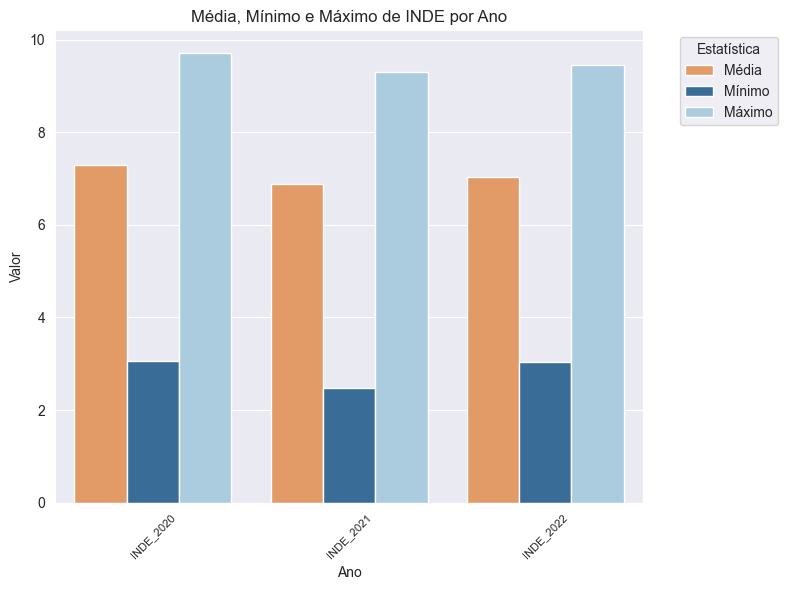

In [66]:
quantitative_ = {
    'INDE': ['INDE_2020', 'INDE_2021', 'INDE_2022']
}

for category, columns in quantitative_.items():
    plt.figure(figsize=(8, 6))
    sns.set_style('darkgrid')
    
    data = df_clean[columns].agg(['mean', 'min', 'max']).T.reset_index()
    data.columns = ['Ano', 'Média', 'Mínimo', 'Máximo']
    
    data_melted = pd.melt(data, id_vars=["Ano"], value_vars=["Média", "Mínimo", "Máximo"], 
                          var_name="Estatística", value_name="Valor")
    
    sns.barplot(data=data_melted, x='Ano', y='Valor', hue='Estatística', palette=['#F79651', '#2A6DA6', '#A2CFE6'])
    plt.title(f'Média, Mínimo e Máximo de {category} por Ano', fontsize=12)
    plt.ylabel('Valor', fontsize=10)
    plt.xlabel('Ano', fontsize=10)
    plt.xticks(rotation=45, fontsize=8)
    plt.legend(title='Estatística', fontsize=10, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()



* **Detecção de Outliers**

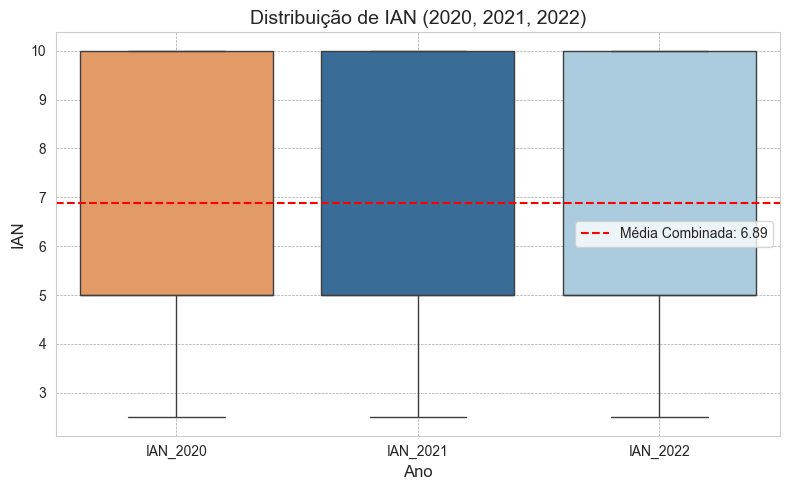

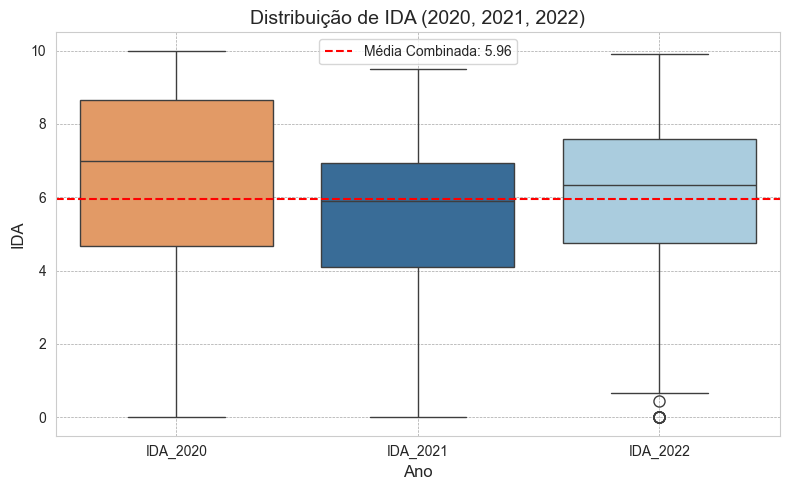

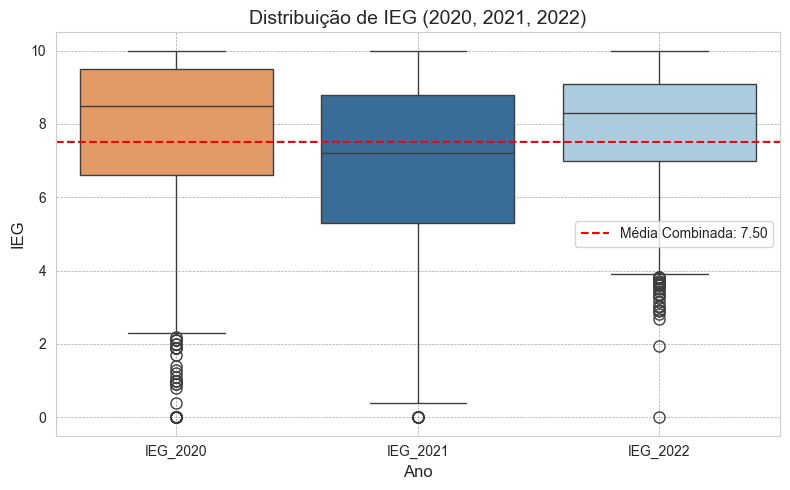

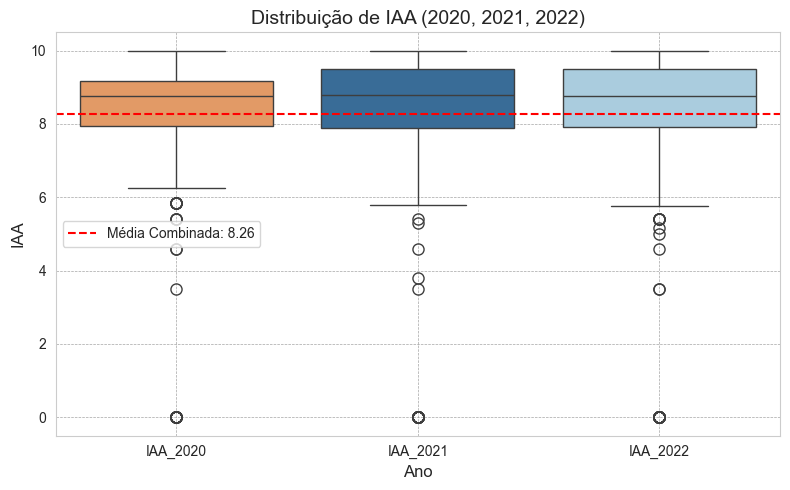

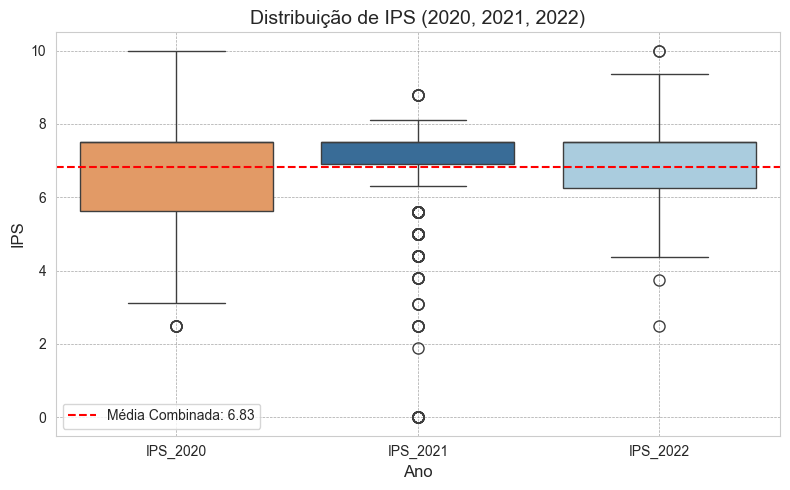

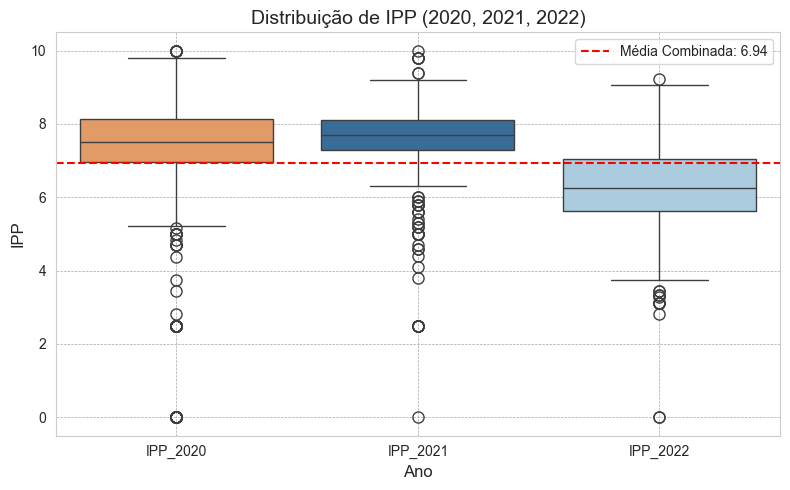

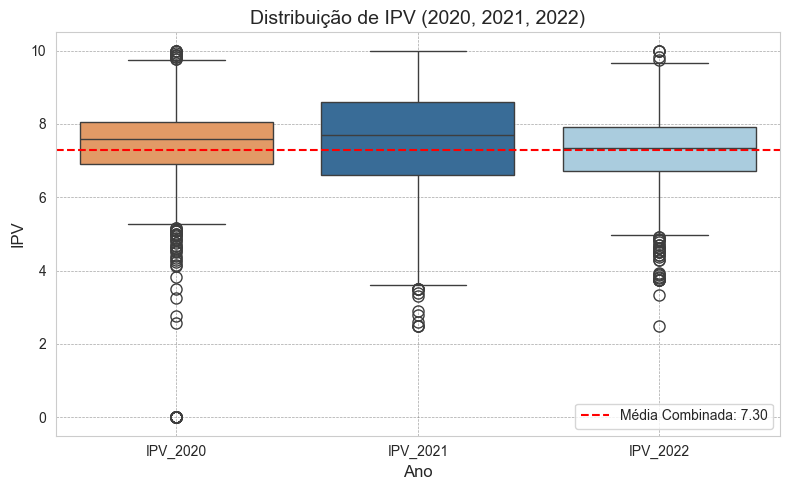

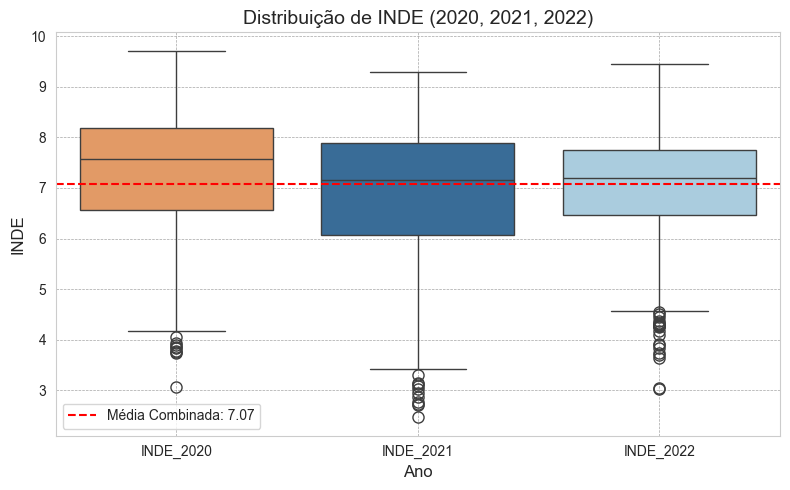

In [67]:
for col_base in ['IAN', 'IDA', 'IEG', 'IAA', 'IPS', 'IPP', 'IPV', 'INDE']:
    cols = [f"{col_base}_{year}" for year in [2020, 2021, 2022]]  
    df_plot = df_clean[cols].melt(var_name='Ano', value_name='Valor')
    
    plt.figure(figsize=(8, 5))  
    custom_palette = ['#F79651', '#2A6DA6', '#A2CFE6']
    sns.set_style('whitegrid')  
    sns.boxplot(x='Ano', y='Valor', data=df_plot, palette=custom_palette, fliersize=8)
    combined_mean = df_plot['Valor'].mean()
    plt.axhline(combined_mean, color='red', linestyle='--', label=f'Média Combinada: {combined_mean:.2f}')
    plt.title(f'Distribuição de {col_base} (2020, 2021, 2022)', fontsize=14)
    plt.xlabel('Ano', fontsize=12)
    plt.ylabel(f'{col_base}', fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.legend(fontsize=10)
    plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
    plt.tight_layout()
    plt.show()


* **Correlação entre Variáveis**

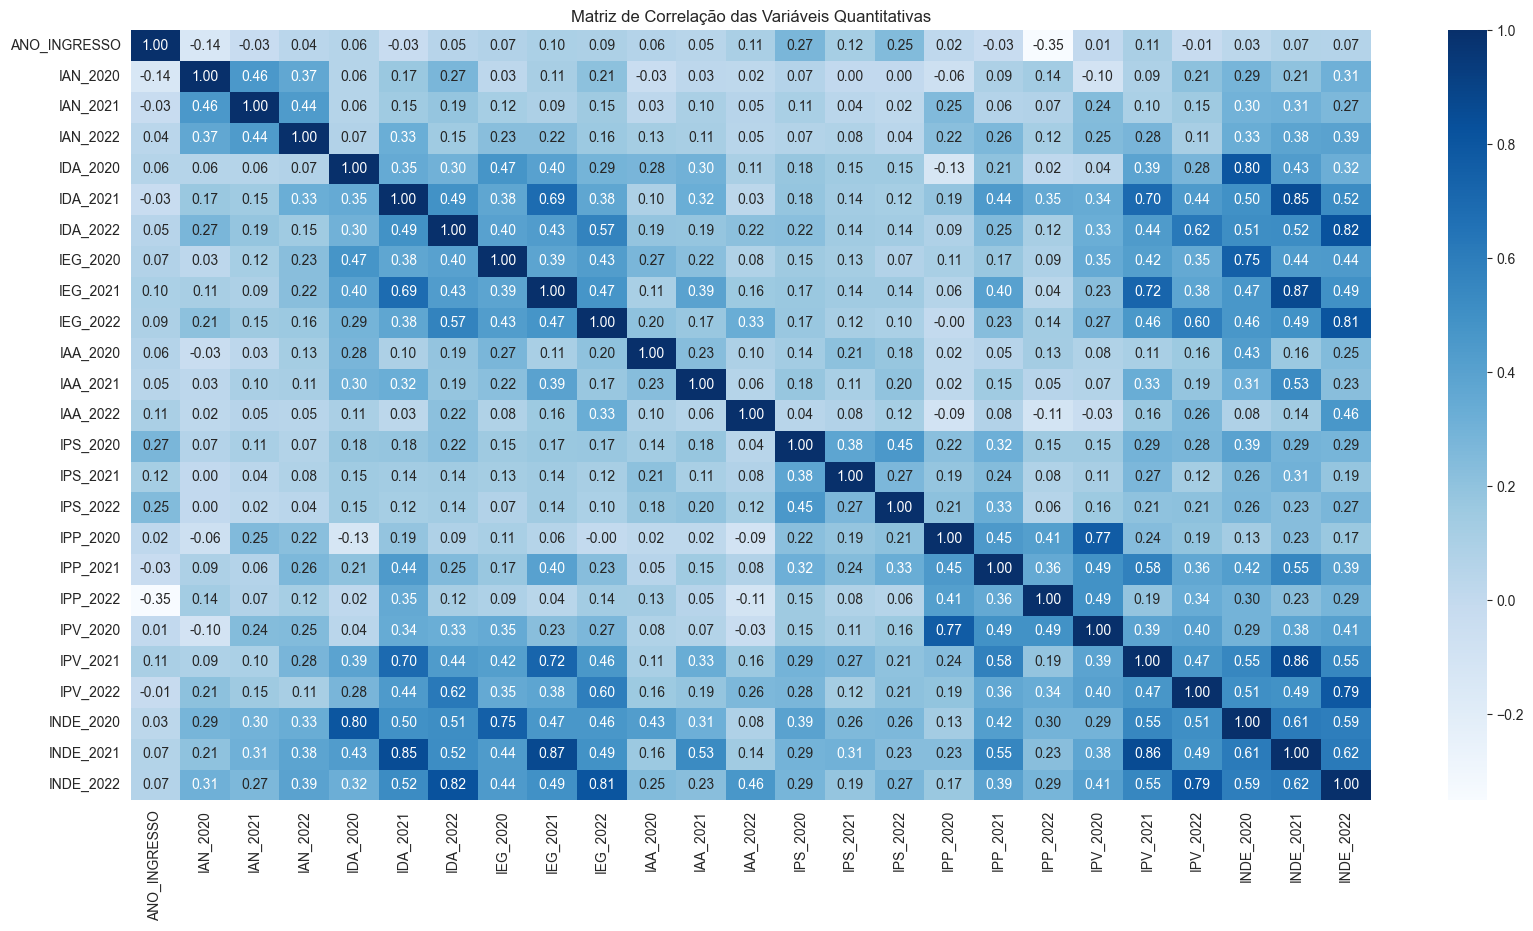

In [68]:
correlation_matrix = df_clean[quantitative_columns_total].corr()
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt='.2f')
plt.title('Matriz de Correlação das Variáveis Quantitativas')
plt.show()

* **Análise Temporal**

*Tendências Anuais:*

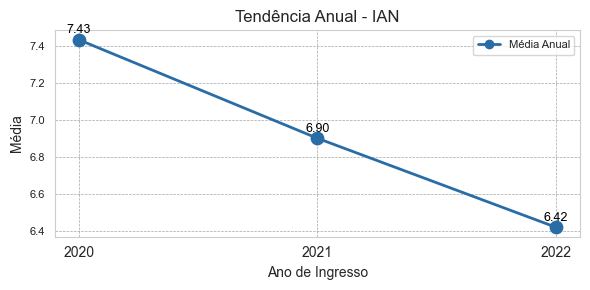

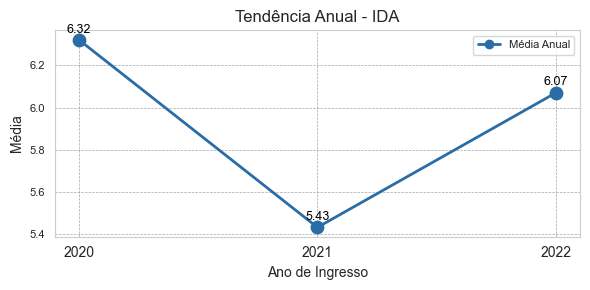

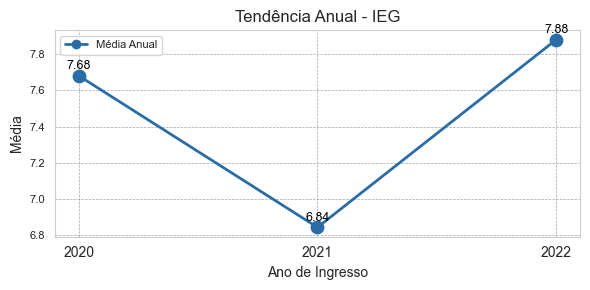

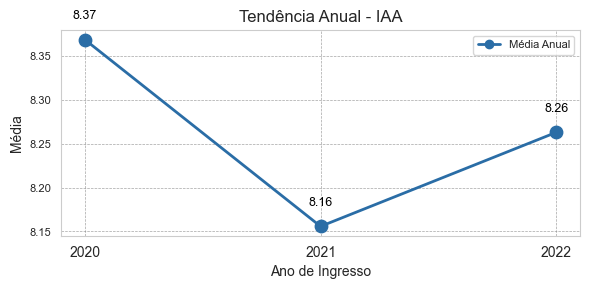

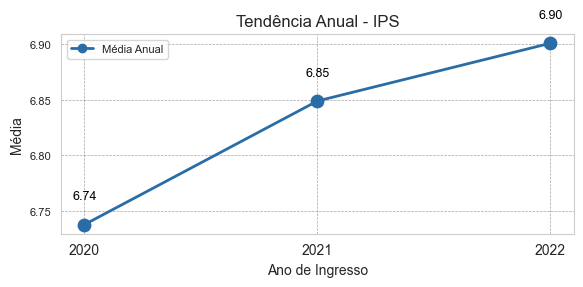

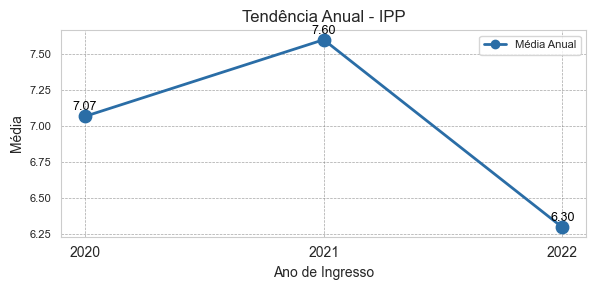

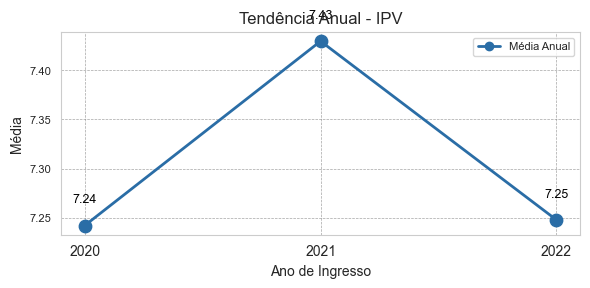

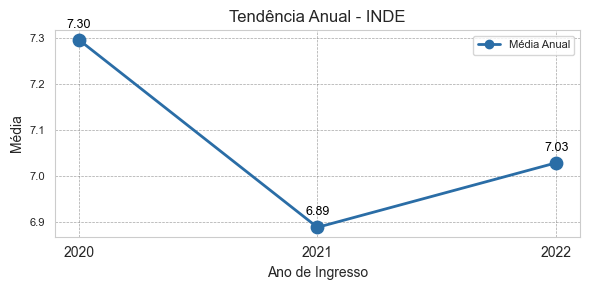

In [69]:
for col_base in ['IAN', 'IDA', 'IEG', 'IAA', 'IPS', 'IPP', 'IPV', 'INDE']:
    plt.figure(figsize=(6, 3))  
    sns.set_style('whitegrid')  
    cols = [f"{col_base}_{year}" for year in [2020, 2021, 2022]]
    mean_values = df_clean[cols].mean()
    plt.plot(mean_values.index, mean_values.values, marker='o', color='#2A6DA6', linewidth=2, label='Média Anual')

    for year, value in zip(mean_values.index, mean_values.values):
        plt.scatter(year, value, color='#2A6DA6', s=80, zorder=5)
        plt.text(year, value + 0.02, f'{value:.2f}', ha='center', va='bottom', fontsize=9, color='black')

    plt.title(f"Tendência Anual - {col_base}", fontsize=12)
    plt.xlabel('Ano de Ingresso', fontsize=10)
    plt.ylabel("Média", fontsize=10)

    plt.xticks(ticks=mean_values.index, labels=[c.split('_')[-1] for c in mean_values.index], fontsize=10)
    plt.yticks(fontsize=8)

    plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
    plt.legend(fontsize=8, loc='best')
    plt.tight_layout()
    plt.show()


 
* **Visualização de Densidade:**

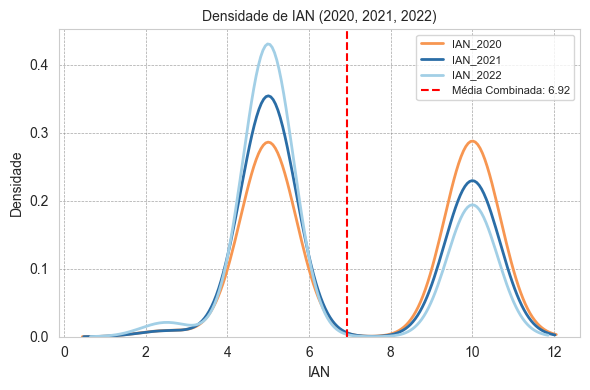

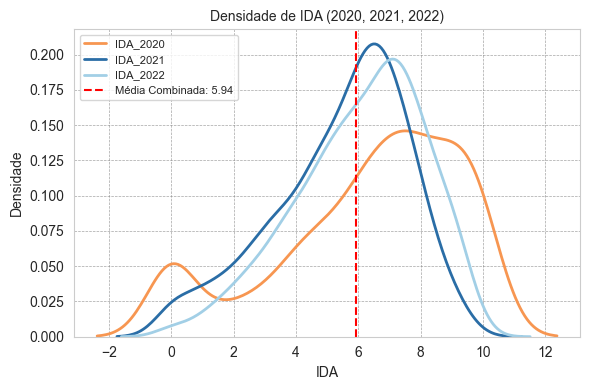

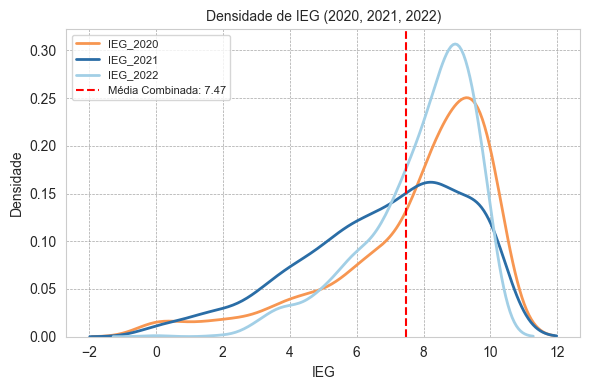

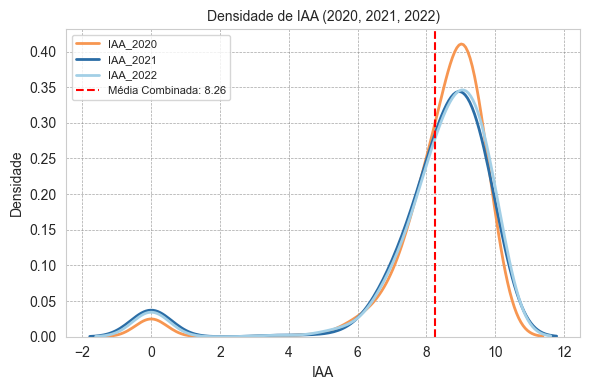

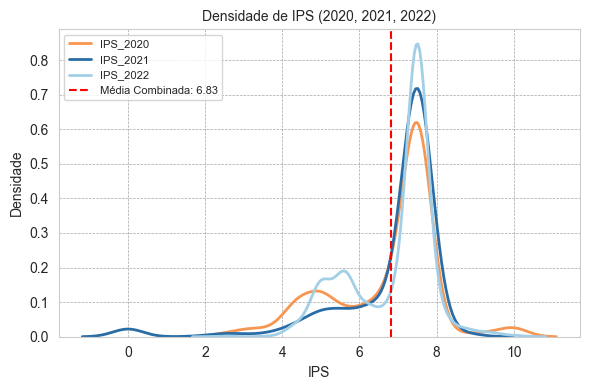

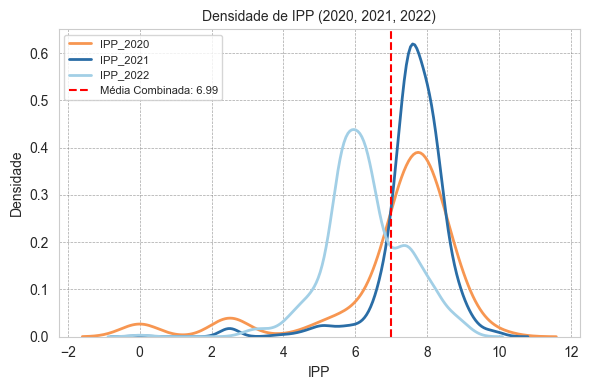

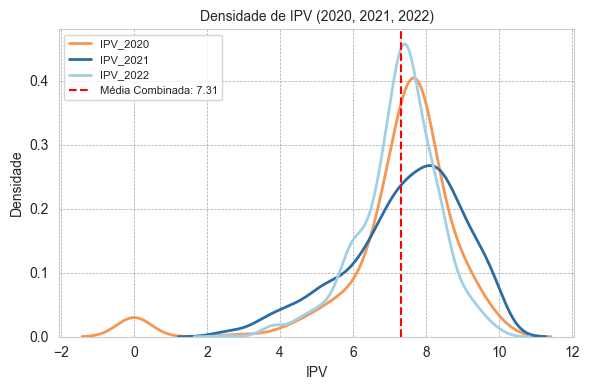

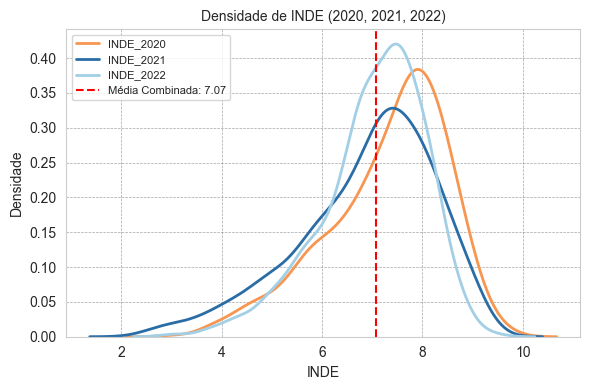

In [70]:

for col_base in ['IAN', 'IDA', 'IEG', 'IAA', 'IPS', 'IPP', 'IPV', 'INDE']:
    cols = [f"{col_base}_{year}" for year in [2020, 2021, 2022]] 
    
    plt.figure(figsize=(6, 4)) 
    sns.set_style('whitegrid')  
    
    mean_values = [] 

    for column, color in zip(cols, ['#F79651', '#2A6DA6', '#A2CFE6']): 
        if column in df_clean.columns:  
            sns.kdeplot(df_clean[column].dropna(), 
                        label=column, 
                        color=color, 
                        linewidth=2)
            mean_value = df_clean[column].mean()
            mean_values.append(mean_value)
    if mean_values: 
        combined_mean = sum(mean_values) / len(mean_values)
        plt.axvline(combined_mean, color='red', linestyle='--', linewidth=1.5, label=f'Média Combinada: {combined_mean:.2f}')

    plt.title(f'Densidade de {col_base} (2020, 2021, 2022)', fontsize=10)
    plt.xlabel(f'{col_base}', fontsize=10)
    plt.ylabel('Densidade', fontsize=10)
    plt.legend(fontsize=8)
    plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
    plt.tight_layout()
    plt.show()

## Questões:
 

1. Saber em qual fase o aluno parou (Data de Entrada e Saída)

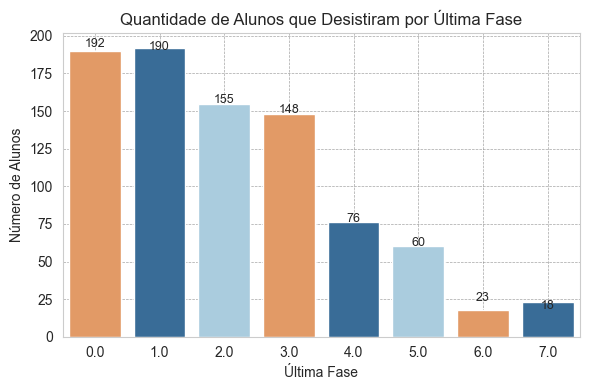

In [71]:
df_clean['FASE_PARADA'] = df_clean[['FASE_2020', 'FASE_2021', 'FASE_2022']].bfill(axis=1).iloc[:, -1]
custom_palette = ['#F79651', '#2A6DA6', '#A2CFE6']
fase_counts = df_clean['FASE_PARADA'].value_counts()

plt.figure(figsize=(6, 4))
sns.set_style('whitegrid')
sns.barplot(x=fase_counts.index, y=fase_counts.values, palette=custom_palette)
plt.title("Quantidade de Alunos que Desistiram por Última Fase", fontsize=12)
plt.xlabel("Última Fase", fontsize=10)
plt.ylabel("Número de Alunos", fontsize=10)

# Adiciona rótulos de valores nas barras
for index, value in enumerate(fase_counts.values):
    plt.text(index, value + 0.5, str(value), ha='center', fontsize=9)

plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()

2a. Saber diante das notas gerais em qual classificação estão as desistencias.

In [72]:
df_clean['STATUS_ALUNO'].unique()

array(['Desistiu em 2022', 'Retornou em 2022', 'Ativo',
       'Desistiu em 2021', 'Desistencia'], dtype=object)

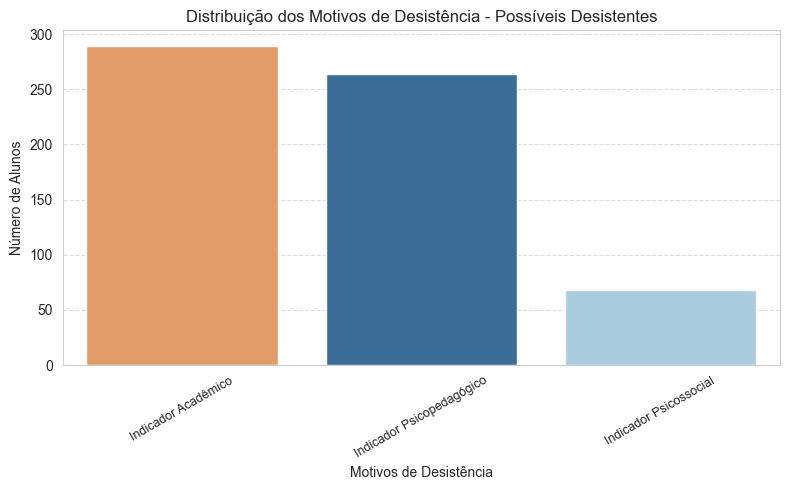

In [73]:
df_clean['dimensao_academica'] = df_clean[['IAN_2020', 'IDA_2020', 'IEG_2020',
                                           'IAN_2021', 'IDA_2021', 'IEG_2021',
                                           'IAN_2022', 'IDA_2022', 'IEG_2022']].mean(axis=1)

df_clean['dimensao_psicossocial'] = df_clean[['IAA_2020', 'IPS_2020',
                                              'IAA_2021', 'IPS_2021',
                                              'IAA_2022', 'IPS_2022']].mean(axis=1)

df_clean['dimensao_psicopedagogica'] = df_clean[['IPP_2020', 'IPV_2020',
                                                 'IPP_2021', 'IPV_2021',
                                                 'IPP_2022', 'IPV_2022']].mean(axis=1)

# Filtrando alunos com possível desistência
df_desistencia = df_clean[df_clean['STATUS_ALUNO'] == 'Desistencia']

# Identificando o menor indicador como motivo de desistência
df_desistencia['MOTIVO_DESISTENCIA'] = df_desistencia[
    ['dimensao_academica', 'dimensao_psicossocial', 'dimensao_psicopedagogica']
].idxmin(axis=1)

# Tradução dos motivos
traducao_dimensoes = {
    'dimensao_academica': 'Indicador Acadêmico',
    'dimensao_psicossocial': 'Indicador Psicossocial',
    'dimensao_psicopedagogica': 'Indicador Psicopedagógico'
}
df_desistencia['MOTIVO_DESISTENCIA'] = df_desistencia['MOTIVO_DESISTENCIA'].map(traducao_dimensoes)

# Contando os motivos de desistência
motivos_counts = df_desistencia['MOTIVO_DESISTENCIA'].value_counts()

# Criando o gráfico de barras
plt.figure(figsize=(8, 5))
sns.barplot(x=motivos_counts.index, y=motivos_counts.values, palette=custom_palette)
plt.title("Distribuição dos Motivos de Desistência - Possíveis Desistentes", fontsize=12)
plt.xlabel("Motivos de Desistência", fontsize=10)
plt.ylabel("Número de Alunos", fontsize=10)
plt.xticks(rotation=30, fontsize=9)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

2b. Justificativa de desistência: Índices menores

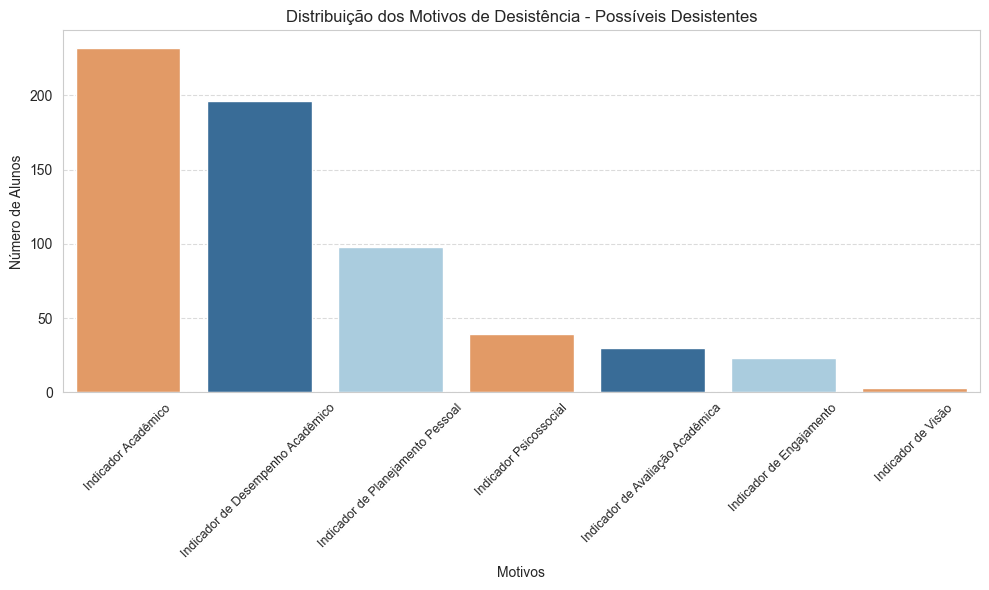

In [74]:
colunas_abordadas = [
    'IAN_2020', 'IAN_2021', 'IAN_2022', 'IDA_2020', 'IDA_2021', 'IDA_2022',
    'IEG_2020', 'IEG_2021', 'IEG_2022', 'IAA_2020', 'IAA_2021', 'IAA_2022',
    'IPS_2020', 'IPS_2021', 'IPS_2022', 'IPP_2020', 'IPP_2021', 'IPP_2022',
    'IPV_2020', 'IPV_2021', 'IPV_2022'
]

df_desistencia = df_clean[df_clean['STATUS_ALUNO'] == 'Desistencia'][colunas_abordadas]
df_desistencia['MOTIVO_DESISTENCIA'] = df_desistencia.idxmin(axis=1)
traducao_motivos = {
    'IAN': 'Indicador Acadêmico',
    'IDA': 'Indicador de Desempenho Acadêmico',
    'IEG': 'Indicador de Engajamento',
    'IAA': 'Indicador de Avaliação Acadêmica',
    'IPS': 'Indicador Psicossocial',
    'IPP': 'Indicador de Planejamento Pessoal',
    'IPV': 'Indicador de Visão'
}

df_desistencia['MOTIVO_DESISTENCIA'] = df_desistencia['MOTIVO_DESISTENCIA'].str.extract(r'(\w+)_\d+')
df_desistencia['MOTIVO_DESISTENCIA'] = df_desistencia['MOTIVO_DESISTENCIA'].map(traducao_motivos)

motivos_counts = df_desistencia['MOTIVO_DESISTENCIA'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=motivos_counts.index, y=motivos_counts.values, palette=custom_palette)
plt.title("Distribuição dos Motivos de Desistência - Possíveis Desistentes", fontsize=12)
plt.xlabel("Motivos", fontsize=10)
plt.ylabel("Número de Alunos", fontsize=10)
plt.xticks(rotation=45, fontsize=9)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()




3. Tempo de Permanência para alunos com "Possível desistência

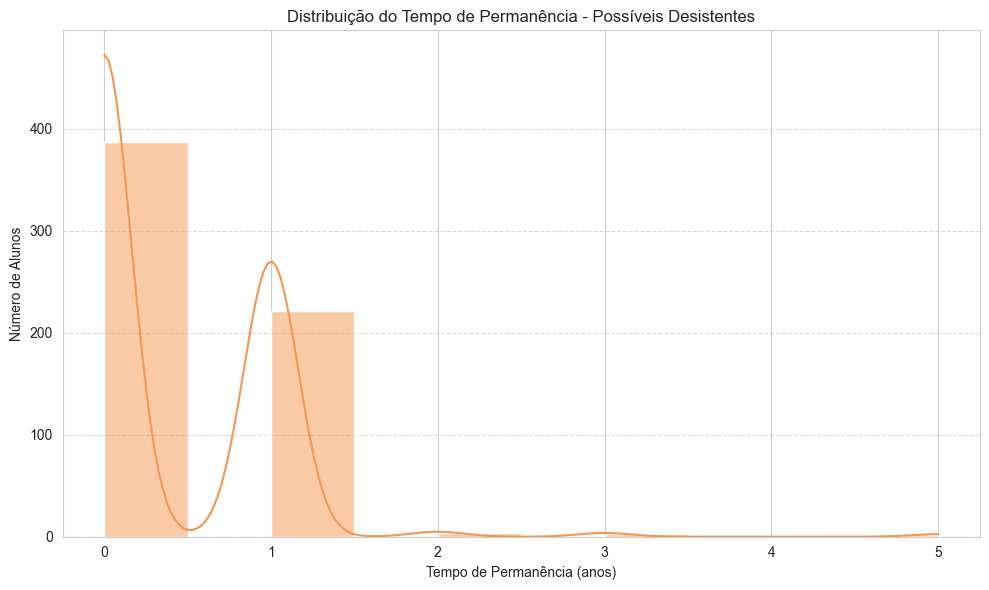

Média de tempo de permanência dos alunos classificados como 'Desistencia': 0.40 anos


In [75]:
df_desistencia = df_clean[df_clean['STATUS_ALUNO'] == 'Desistencia'].copy()

# Calcula o tempo de permanência com base no ano de ingresso
if 'ANO_INGRESSO' in df_desistencia.columns:
    # Usa 2022 como o último ano de referência
    df_desistencia['TEMPO_PERMANENCIA'] = 2022 - df_desistencia['ANO_INGRESSO']
else:
    raise KeyError("A coluna 'ANO_INGRESSO' não está presente no dataframe.")

# Gráfico de distribuição do tempo de permanência
plt.figure(figsize=(10, 6))
sns.histplot(df_desistencia['TEMPO_PERMANENCIA'], kde=True, color='#F79651', bins=10)
plt.title("Distribuição do Tempo de Permanência - Possíveis Desistentes", fontsize=12)
plt.xlabel("Tempo de Permanência (anos)", fontsize=10)
plt.ylabel("Número de Alunos", fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Calcula e imprime a média do tempo de permanência
media_tempo = df_desistencia['TEMPO_PERMANENCIA'].mean()
print(f"Média de tempo de permanência dos alunos classificados como 'Desistencia': {media_tempo:.2f} anos")

4. Justificativa de Permanência (Índices Maiores)

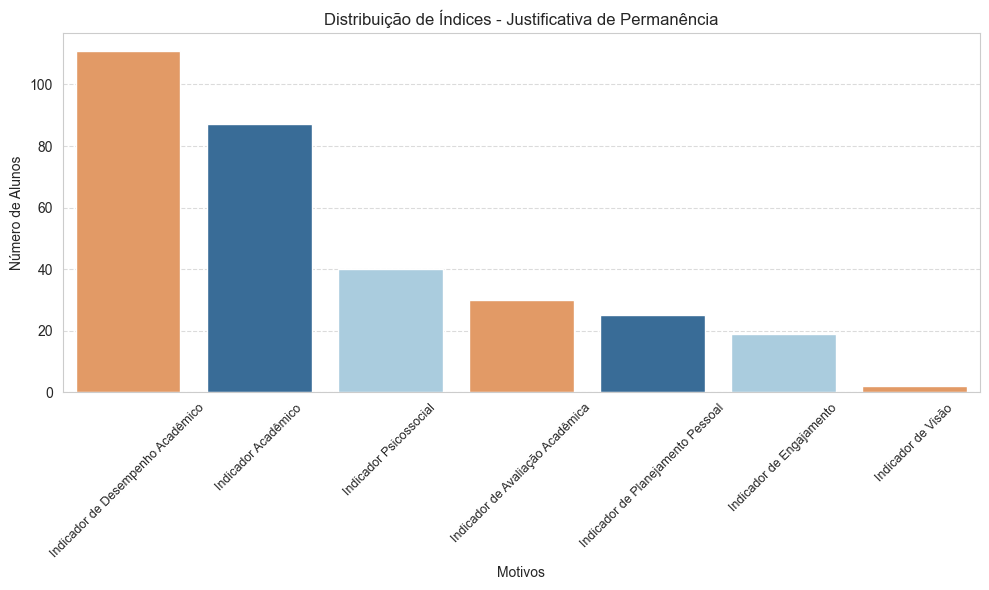

In [76]:

df_permanencia = df_clean[df_clean['STATUS_ALUNO'] == 'Ativo'][colunas_abordadas]

df_permanencia['MOTIVO_PERMANENCIA'] = df_permanencia.idxmin(axis=1).str.extract(r'(\w+)_\d+')
df_permanencia['MOTIVO_PERMANENCIA'] = df_permanencia['MOTIVO_PERMANENCIA'].map(traducao_motivos)
motivos_counts = df_permanencia['MOTIVO_PERMANENCIA'].value_counts()


plt.figure(figsize=(10, 6))
sns.barplot(x=motivos_counts.index, y=motivos_counts.values, palette=custom_palette)
plt.title("Distribuição de Índices - Justificativa de Permanência", fontsize=12)
plt.xlabel("Motivos", fontsize=10)
plt.ylabel("Número de Alunos", fontsize=10)
plt.xticks(rotation=45, fontsize=9)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()




5. Tempo de permanência dos alunos na fase 7

      FASE_PARADA  PERMANENCIA_ANOS
31            7.0               6.0
137           7.0               5.0
138           7.0               6.0
199           7.0               5.0
208           7.0               6.0
295           7.0               5.0
305           7.0               4.0
319           7.0               3.0
504           7.0               6.0
509           7.0               2.0
596           7.0               6.0
735           7.0               1.0
788           7.0               1.0
856           7.0               1.0
900           7.0               1.0
970           7.0               0.0
984           7.0               0.0
1066          7.0               0.0
1113          7.0               0.0
1176          7.0               0.0
1226          7.0               0.0
1279          7.0               0.0
1292          7.0               0.0


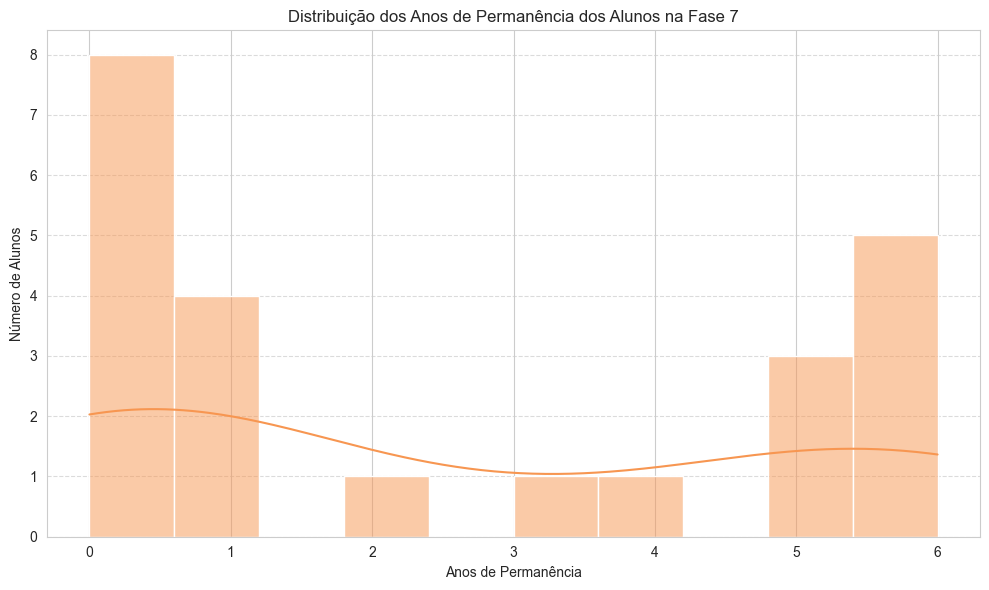

In [77]:
df_fase7 = df_clean[df_clean['FASE_PARADA'] == 7].copy()

# Calcula o ano de permanência e o tempo de permanência
if 'ANO_INGRESSO' in df_fase7.columns:
    df_fase7['PERMANENCIA_ANOS'] = 2022 - df_fase7['ANO_INGRESSO']
else:
    raise KeyError("A coluna 'ANO_INGRESSO' não está presente no dataframe.")

# Exibe as informações relevantes
print(df_fase7[['FASE_PARADA', 'PERMANENCIA_ANOS']])

# Gráfico de distribuição dos anos de permanência
plt.figure(figsize=(10, 6))
sns.histplot(df_fase7['PERMANENCIA_ANOS'], kde=True, color='#F79651', bins=10)
plt.title("Distribuição dos Anos de Permanência dos Alunos na Fase 7", fontsize=12)
plt.xlabel("Anos de Permanência", fontsize=10)
plt.ylabel("Número de Alunos", fontsize=10)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

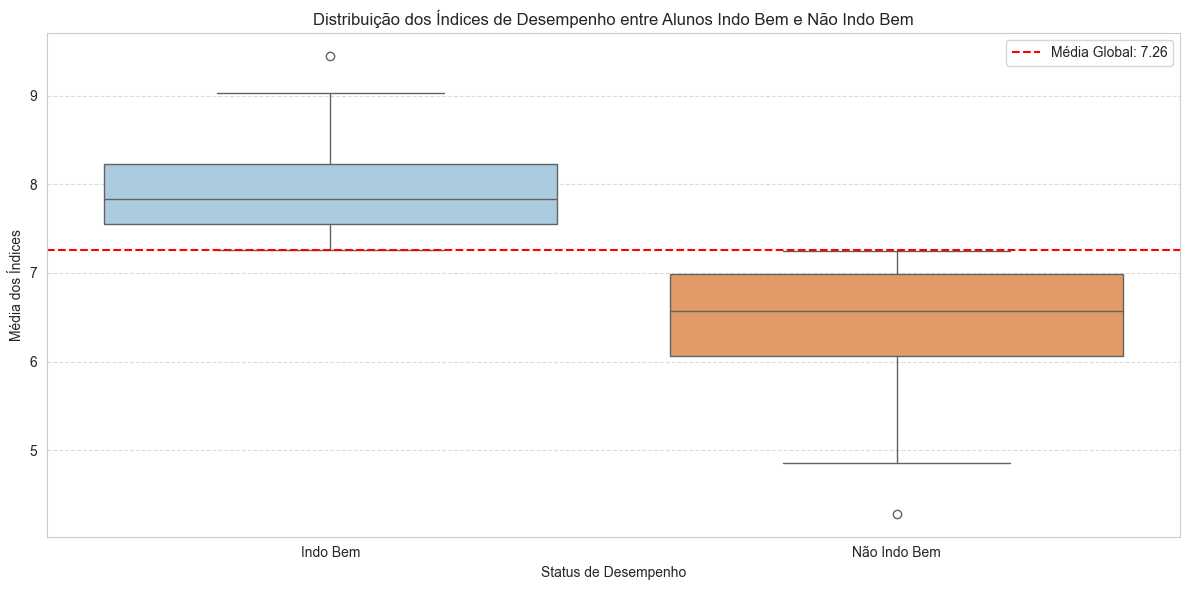

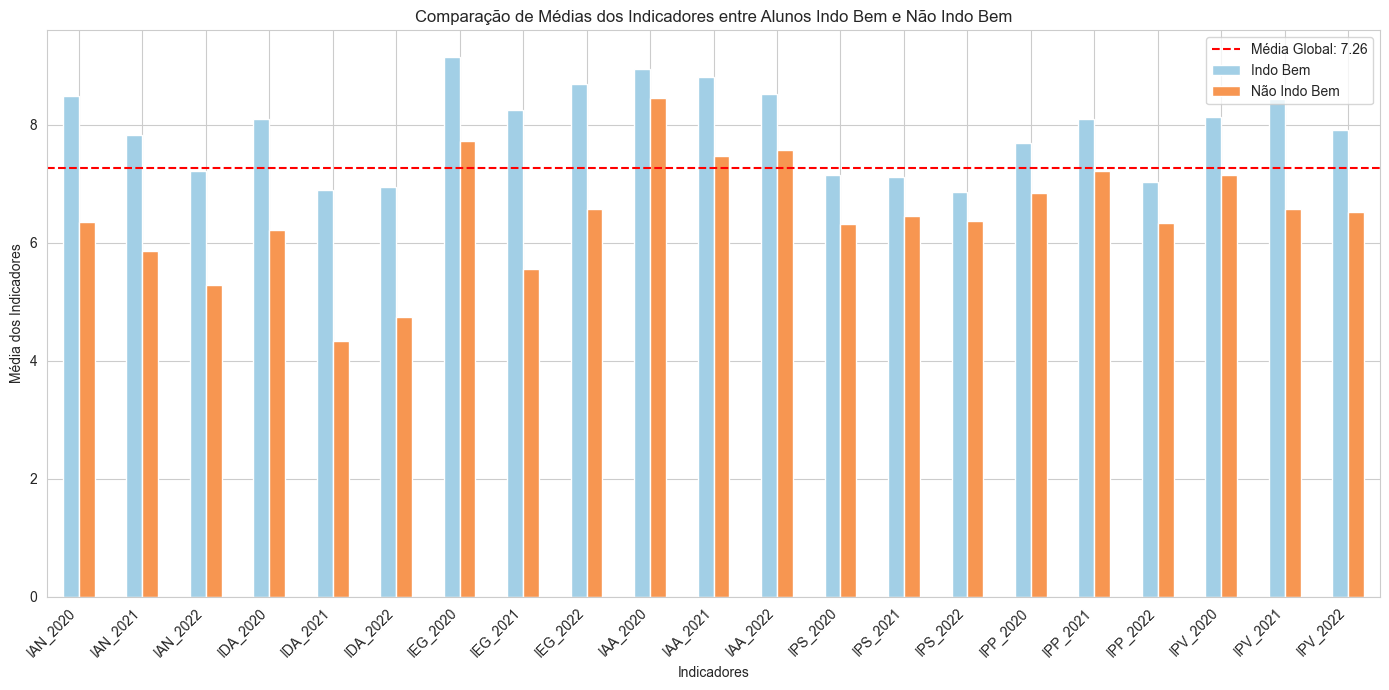

Média global dos índices: 7.26


In [78]:
df_ativos = df_clean[df_clean['STATUS_ALUNO'] == 'Ativo']
indices = ['IAN_2020', 'IAN_2021', 'IAN_2022', 'IDA_2020', 'IDA_2021', 'IDA_2022', 
           'IEG_2020', 'IEG_2021', 'IEG_2022', 'IAA_2020', 'IAA_2021', 'IAA_2022',
           'IPS_2020', 'IPS_2021', 'IPS_2022', 'IPP_2020', 'IPP_2021', 'IPP_2022', 
           'IPV_2020', 'IPV_2021', 'IPV_2022']

df_ativos['MEDIA_INDICES'] = df_ativos[indices].mean(axis=1)

media_global = df_ativos[indices].stack().mean()
limite_bem = media_global

df_ativos['STATUS_DESEMPENHO'] = ['Indo Bem' if x > limite_bem else 'Não Indo Bem' for x in df_ativos['MEDIA_INDICES']]
df_comparacao = df_ativos.groupby('STATUS_DESEMPENHO')[indices].mean()

# comparações entre os grupos
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_ativos, x='STATUS_DESEMPENHO', y='MEDIA_INDICES', palette=['#A2CFE6', '#F79651'])
plt.title('Distribuição dos Índices de Desempenho entre Alunos Indo Bem e Não Indo Bem', fontsize=12)
plt.xlabel('Status de Desempenho', fontsize=10)
plt.ylabel('Média dos Índices', fontsize=10)
plt.axhline(y=media_global, color='red', linestyle='--', label=f'Média Global: {media_global:.2f}')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# omparações entre indicadores
df_comparacao.T.plot(kind='bar', figsize=(14, 7), color=['#A2CFE6', '#F79651'])
plt.title('Comparação de Médias dos Indicadores entre Alunos Indo Bem e Não Indo Bem', fontsize=12)
plt.ylabel('Média dos Indicadores', fontsize=10)
plt.xlabel('Indicadores', fontsize=10)
plt.xticks(rotation=45, ha='right')
plt.axhline(y=media_global, color='red', linestyle='--', label=f'Média Global: {media_global:.2f}')
plt.legend()
plt.tight_layout()
plt.show()

print(f"Média global dos índices: {media_global:.2f}")


## Analise de todos os gráficos e estaística

### **Introdução**

Este documento apresenta as análises realizadas sobre o desempenho educacional dos alunos da ONG "Passos Mágicos" durante os anos de 2020, 2021 e 2022. O objetivo foi compreender os padrões de progresso, desistências, e os fatores que influenciam o aprendizado dos alunos. Os dados analisados incluem diversos indicadores, como desempenho acadêmico, engajamento, adequação ao nível e aspectos psicossociais.



### **Resultados da Análise**

*Frequência de Alunos por Fase*
* 2020: A maior concentração de alunos estava nas fases 1 a 3.
* 2021 e 2022: As fases 0 a 3 apresentaram distribuições equilibradas, mas houve uma queda expressiva no número de alunos a partir da fase 4. Em todos os anos, a quantidade de alunos reduzia pela metade a cada avanço de fase.

*Distribuição das Pedras (Classificação pelo INDE)*

As classificações são baseadas nos seguintes intervalos:
* Quartzo: 2,405 a 5,506
* Ágata: 5,506 a 6,868
* Ametista: 6,868 a 8,230
* Topázio: 8,230 a 9,294

* 2020: Houve um número considerável de alunos classificados como Quartzo e Ametista, indicando uma boa distribuição entre os extremos.

* 2021 e 2022: A maior parte dos alunos foi classificada como Ametista e Topázio, demonstrando um desempenho geral elevado.

*Indicador Ponto de Virada*

Embora muitos alunos apresentassem bom desempenho em suas respectivas fases, a maioria não atingiu o ponto de virada nos três anos analisados.


*Desistências: Impactos Temporais e Perfil Acadêmico*

* Análise Temporal:
    * O ano de 2021 apresentou o maior índice de desistências, um fenômeno amplamente associado aos impactos da pandemia de COVID-19.

* Perfil das Desistências:
    * A maioria das desistências ocorreu entre estudantes nas fases iniciais do curso (fases 0 a 3), evidenciando maior vulnerabilidade nesse estágio acadêmico. Por outro lado, os índices de desistências nas fases mais avançadas foram significativamente menores.

* Classificação dos Alunos:

    * Ativos (314): Estudantes que permaneceram matriculados durante os três anos analisados (2020, 2021 e 2022).
    * Retornaram em 2022 (13): Alunos que participaram em 2020, não estiveram presentes em 2021 (classificados como ausentes) e retornaram em 2022.

* Desistências:
    * Desistências em 2022: Foram registrados 141 casos de desistências.
    * Desistências em anos anteriores: Até 2021, acumulou-se um total de 880 desistências, sendo 259 casos apenas no ano de 2021.
* Destaques da Análise:
    * A análise evidencia o impacto temporal das desistências, destacando as fases iniciais como as mais críticas em termos de evasão acadêmica. Além disso, reforça o papel de eventos externos, como a pandemia, no comportamento e engajamento dos estudantes.


*Desempenho Geral (INDE)*

* A análise do INDE mostrou que a maioria dos alunos teve desempenho acima da média em todos os anos, com um aumento gradual de notas altas entre 2020 e 2022.

*Outliers nos Indicadores*

* IEG (Engajamento): Muitos alunos apresentaram notas abaixo da média, indicando desafios de engajamento.
* IAA (Autoavaliação): Poucos alunos se autoavaliaram negativamente, sugerindo confiança no próprio progresso.
* IPS (Psicossocial): O ano de 2021 teve os piores resultados, possivelmente devido às dificuldades impostas pela pandemia.
* IPP (Psicopedagógico): Notas baixas predominam em 2020 e 2021, mas houve melhora significativa em 2022.

*Correlação entre Indicadores*

* Os indicadores de avaliação apresentaram alta correlação com o INDE, reforçando a importância desses fatores para o desenvolvimento educacional.

*Tendência Anual*

* 2020: Maior média geral de notas.
* 2021: Desempenho mais baixo, refletindo as dificuldades da pandemia.
* 2022: Recuperação significativa, com aumento de novos ingressos e melhoria no desempenho geral.

### **Conclusão**

As análises revelaram padrões importantes no progresso e nos desafios enfrentados pelos alunos da ONG Passos Mágicos:

* A maioria dos alunos progride bem ao longo dos anos, mas as fases iniciais apresentam maior índice de desistência.
* A pandemia impactou negativamente o engajamento, o desempenho psicossocial e o psicopedagógico em 2021.
* Indicadores como IEG e INDE são cruciais para monitorar o desenvolvimento acadêmico.

### **Especulação de Melhorias para a ONG**

* Redução de Desistências nas Fases Iniciais: Implementar programas de incentivo personalizados para alunos das fases 0 a 3, como mentoria individualizada, apoio financeiro e acompanhamento familiar.

* Engajamento Acadêmico: Desenvolver atividades interativas e adaptadas à realidade dos alunos para melhorar o engajamento, especialmente para aqueles com baixos índices de IEG.

* Apoio Psicossocial: Aumentar o suporte psicológico para minimizar os efeitos de crises externas, como a pandemia, oferecendo sessões de acompanhamento mais frequentes.

* Monitoramento Contínuo: Implementar um sistema de monitoramento que avalie regularmente o progresso dos alunos e identifique precocemente os riscos de desistência.

* Integração Familiar: Envolver as famílias no processo educacional, promovendo workshops e reuniões para conscientizar sobre a importância da continuidade acadêmica.

Com essas estratégias, espera-se que a ONG Passos Mágicos possa aumentar a retenção dos alunos e promover um impacto ainda maior na formação educacional e social dos beneficiários.


In [79]:
df_clean_completo.to_csv('df_clean_completo.csv', index=False)

In [80]:
df_clean.to_csv('df_clean.csv', index=False)

## Tratamento dos dados

In [81]:
'''
Predição de desempenho futuro e análise de outliers (O que fez alguns alunos serem um dos melhores que já passou na Passos?)
Predição para recomendação de bolsas, intercambio, etc
Análise comparatória de 2020, 2021 e 2022
Análise de alunos (de forma individual? 🤔) ao longo dos anos (Ex: temos dados do 'ALUNO 1' em 2020 e 2021, já em 2022 não temos dados... Seria talvez desistência?)
Análise de alunos que estão indo bem Vs alunos que não estão indo bem. Tentar entender o porquê um aluno vai bem e outro não.
Tentar prever qual seria a “pedra” de um novo aluno com X pontuações de índices em uma nova entrada
'''

"\nPredição de desempenho futuro e análise de outliers (O que fez alguns alunos serem um dos melhores que já passou na Passos?)\nPredição para recomendação de bolsas, intercambio, etc\nAnálise comparatória de 2020, 2021 e 2022\nAnálise de alunos (de forma individual? 🤔) ao longo dos anos (Ex: temos dados do 'ALUNO 1' em 2020 e 2021, já em 2022 não temos dados... Seria talvez desistência?)\nAnálise de alunos que estão indo bem Vs alunos que não estão indo bem. Tentar entender o porquê um aluno vai bem e outro não.\nTentar prever qual seria a “pedra” de um novo aluno com X pontuações de índices em uma nova entrada\n"